# Machine Learning for Acoustic Emisson in Cylindrical Cells

## 1. Principal Component Analysis and k-means Clustering Method with Pristine Cell Data

The dataset we are working with in section 1 is all from pristine cell cycling (C/3 and 1C). It excludes background noise data collection.

### 1.1. Principal Component Analysis

Principal component analysis (PCA) is a method of feature extraction and dimensionality reduction. The goal of PCA is to transform the original data set which contains numerous variables into a new data set which has fewer variables but still contains most of the information of the original data set. PCA has five steps:

1. We perform standardization to all of our variables (features) so that all variables are transformed to the same scale (so that variables with inherently larger ranges don't dominate over variables with smaller ranges).
2. Secondly, we compute the covariance matrix (p x p, where p is the numnber of dimensions or the number of features that we have). The covariance matrix is a symmetric matrix containing all possible pairs of covariances between the variables as entries.
3. "Now we compute the eigenvectors and eigenvalues of the covariance matrix in order to find out the principal components (i.e. perform eigendecomposition of the covariance matrix). Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. Eigenvectors of the covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call principal components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component. By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance."
4. Now we calculate the feature vector, matrix that has as columns the eigenvectors of the components that we decide to keep (depending how much of a reduced dimensionality we want).
5. Recast the data along principal component axes. That is, use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components. This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.
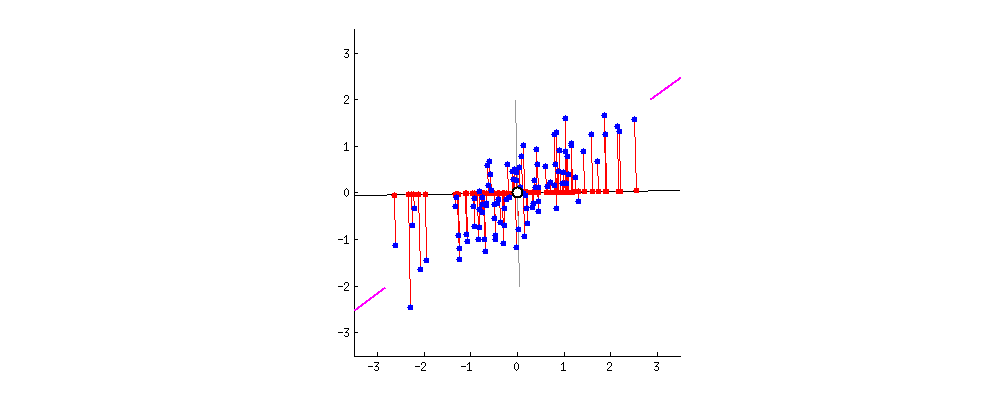
Lower dimensional analogy for how a principal component finds directions in input space which maximises variance between variables.

In [1]:
import pandas as pd

acoustic_hits = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/Pristine P42A Machine Learning Data.csv', delimiter =',')
original_data = acoustic_hits # just creating a copy before we make changes to the data

In [2]:
acoustic_hits.drop(['Waveform Number', 'C-Rate', 'Transducer Position'], inplace=True, axis=1) # Waveform number isn't relevant data
acoustic_hits

Rise Time  Counts to Peak  Energy  Duration  Amplitude  \
0           12               7       0        73         37   
1            1               3       0        64         33   
2            1               1       0        64         25   
3           22               4       0        95         45   
4            1               1       0         1         31   
..         ...             ...     ...       ...        ...   
135         14               3       0        54         34   
136         14               2       0        28         35   
137         15               2       0        28         35   
138         27               9       0        70         39   
139          3               1       0        13         31   

     Average Frequency     RMS  ASL  PCNTS  Threshold  \
0                   95  0.0004   16      3         29   
1                   46  0.0004   16      1         29   
2                   15  0.0004   16      1         29   
3                   42  0.0004   16      2         29   
4                 1000  0.0004   16      1         29   
..                 ...     ...  ...    ...        ...   
135                 55  0.0004   16      2         29   
136                 71  0.0004   16      2         29   
137                 71  0.0004   16      2         29   
138                128  0.0004   16      4         29   
139                 76  0.0004   16      1         29   

     Reverberation Frequency  Initiation Frequency  Signal Strength  \
0                         66                   250        1060000.0   
1                         32                  1000         888000.0   
2                          1                  1000         888000.0   
3                         28                    90        4470000.0   
4                       1000                  1000          58000.0   
..                       ...                   ...              ...   
135                       26                   142         836000.0   
136                        1                   142         570000.0   
137                        1                   133         586000.0   
138                      117                   148        2230000.0   
139                        1                   333         363000.0   

     Absolute Energy  
0             3560.0  
1             1970.0  
2             1970.0  
3            41700.0  
4              206.0  
..               ...  
135           2290.0  
136           2050.0  
137           2140.0  
138          12300.0  
139           1110.0  

[140 rows x 14 columns]

In [3]:
import numpy as np

In [4]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_acoustic_hits = std_scaler.fit_transform(acoustic_hits)

In [5]:
# Displaying the scaled data
scaled_acoustic_hits

array([[-0.12303679,  1.04758382, -0.19528337, ..., -0.35583778,
        -0.09336816, -0.15366368],
       [-0.54503381,  0.03086469, -0.19528337, ...,  1.71092661,
        -0.14442875, -0.22958174],
       [-0.54503381, -0.47749488, -0.19528337, ...,  1.71092661,
        -0.14442875, -0.22958174],
       ...,
       [-0.0079467 , -0.22331509, -0.19528337, ..., -0.67825302,
        -0.23408165, -0.22146472],
       [ 0.45241369,  1.55594338, -0.19528337, ..., -0.63691773,
         0.25396263,  0.26364692],
       [-0.46830708, -0.47749488, -0.19528337, ..., -0.12711585,
        -0.30028231, -0.27064434]])

In [6]:
# Shape of the array should be as expected
print(scaled_acoustic_hits.shape)

(140, 14)


In [7]:
# Compute covariance and apply eigendecomposition using PCA library from Scikit Learn
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # We want to reduce dimensionality to 3
acoustic_hits_reduced = pca.fit_transform(scaled_acoustic_hits) # Fit the model with data and apply the dimensionality reduction on data
acoustic_hits_reduced

array([[ 8.49152756e-01, -1.69444900e+00,  7.66151034e-01],
       [-5.43630613e-01, -1.73797343e-02,  1.16950125e-01],
       [-1.01412816e+00,  5.80400134e-01, -6.90308102e-01],
       [ 2.20836417e+00, -1.39260861e+00,  4.76889714e-01],
       [-2.05118841e+00,  1.97751074e+00,  2.15559124e+00],
       [-1.17381760e-01, -3.95840993e-01, -3.74622912e-01],
       [-4.62418722e-01, -1.06851087e-01,  1.90658719e-01],
       [-8.97837448e-01,  5.64076259e-01, -7.25487541e-01],
       [-1.20470069e-01, -5.81579673e-01, -2.88678222e-01],
       [-3.90845279e-01, -7.65653387e-01,  9.31134910e-02],
       [ 5.42926686e-01, -1.15151027e+00,  2.20267890e-01],
       [-2.61547933e-01, -3.85419043e-02, -1.45519253e+00],
       [ 1.97682293e+00, -2.16158965e+00,  1.76869916e+00],
       [-2.10333375e+00,  2.03984898e+00,  2.08953106e+00],
       [-4.15027460e-01, -7.48364401e-01,  2.86229986e-01],
       [ 3.41158769e-01, -8.62168855e-01, -6.12780629e-01],
       [-4.82538877e-01,  2.32398455e-01

In [8]:
# These are our principal components (notice that we applied dimensionality reduction so we have three principal components)
print(pca.components_)

[[ 2.98255552e-01  2.68315295e-01  3.75036710e-01  3.85418425e-01
   2.41551963e-01 -1.80815495e-01  6.77626358e-21  2.10864066e-01
   2.10629269e-01 -4.13590306e-25 -1.78350699e-01 -1.85749962e-01
   4.09439323e-01  3.68819895e-01]
 [ 4.76961416e-02 -2.73269673e-01  3.16678292e-01  2.43961759e-01
  -3.44422743e-01  3.57143274e-01 -0.00000000e+00  3.29590194e-01
  -4.00344167e-01 -0.00000000e+00  3.59872018e-01  2.56463319e-01
   2.09564999e-01  9.46783979e-02]
 [-2.00733089e-01  4.10936951e-01 -1.61413903e-02 -5.87945376e-02
   3.45504535e-01  5.00703414e-01 -2.77555756e-17 -1.97859137e-02
   3.70886020e-01 -0.00000000e+00  3.65442693e-01  3.63597684e-01
   3.88327688e-03  1.15445980e-01]]


In [9]:
# explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures.
# So we can sum up the ratios to get the total variance in the chosen number of components.
print(sum(pca.explained_variance_ratio_))

0.7538276055454907


Essentially, this means that 75% of the information in the original data set is captured in our transformed dataset in the principal components. It is subjective whether this is enough or not.

<IPython.core.display.Javascript object>


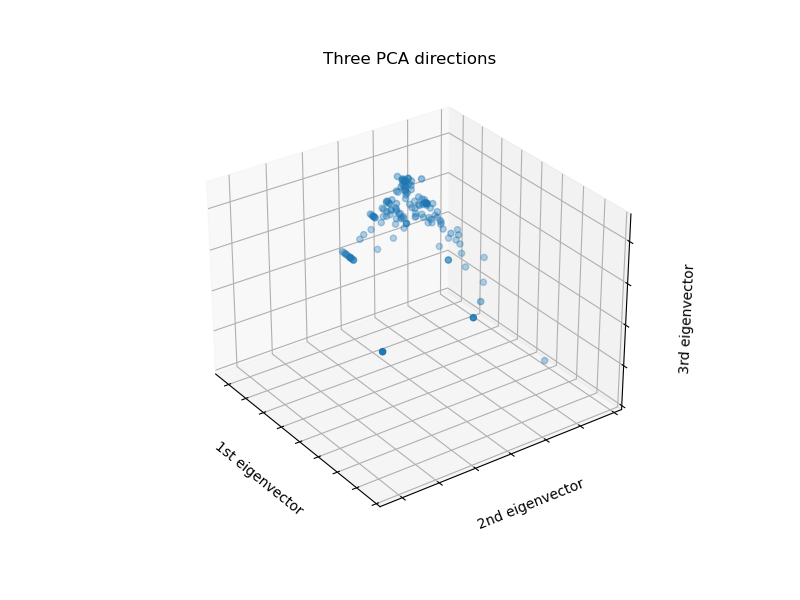

In [10]:
# Visualizing the three principal components and how our transformed data set points map onto that space
%matplotlib notebook

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(1, figsize=(8,6))
ax1 = fig1.add_subplot(111, projection="3d", elev=-150, azim=110)
ax1.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2])

ax1.set_title("Three PCA directions")
ax1.set_xlabel("1st eigenvector")
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector")
ax1.yaxis.set_ticklabels([])
ax1.set_zlabel("3rd eigenvector")
ax1.zaxis.set_ticklabels([])

plt.show()

# If plot is not plotting check maplotlib backend
# import matplotlib
# print(matplotlib.get_backend())

In [11]:
plt.close()

### 1.2. k-means Clustering on Acoustic Hits Dataset

"K-means clustering is a method for grouping n observations into K clusters. It uses vector quantization and aims to assign each observation to the cluster with the nearest mean or centroid, which serves as a prototype for the cluster."

When applying k-means clustering, our goal is to minimise the sum of intra-cluster distance (square of the distance between points in a cluster and the cluster's centroid) so that each cluster is compact. We also want to maximise inter-cluster distance such that different clusters are far apart. The Dunn Index is min(inter-cluster distance)/max(intra-cluster distance) and is a parameter we wish to maximise to improve our clusters. "The silhouette score and plot are used to evaluate the quality of a clustering solution produced by the k-means algorithm. The silhouette score measures the similarity of each point to its own cluster compared to other clusters, and the silhouette plot visualizes these scores for each sample. A high silhouette score indicates that the clusters are well separated, and each sample is more similar to the samples in its own cluster than to samples in other clusters."

"To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids." The standard algorithm is called Lloyd's algorithm and works as follows:

1. Choose the number of clusters (k).
2. We initially don't know what our clusters are and therefore don't know where our centroids will be, so initialise random points as centroids.
3. For each data point, calculate the distance between the data point and each of the centroids. Assign that data point to the closest centroid cluster. Do this for every data point.
4. Re-initialise centroid by calculating new centroids of clusters made in step 3.
5. Repeat steps 3 and 4 until clusters no longer change.

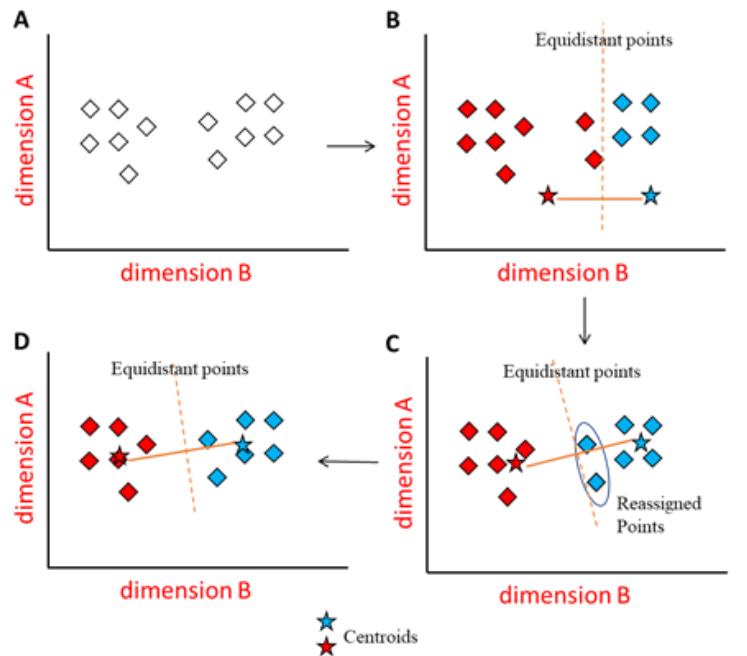

Note: Outliers can have significant effects on k-means clustering. Thus applying outlier detection (e.g. isolation forest algorithm) might be a good idea.

In [328]:
# Trying k-mean clustering
from sklearn.cluster import KMeans

# n_init:
# Number of times the k-means algorithm is run with different centroid seeds.
# The final results is the best output of n_init consecutive runs in terms of inertia.
# n_init= 'auto': the number of runs depends on the value of init:
# random_state: Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
hits_clusters = kmeans.fit(acoustic_hits_reduced) # fit data using model
labels = hits_clusters.labels_ # get labels from clustering analysis

<IPython.core.display.Javascript object>


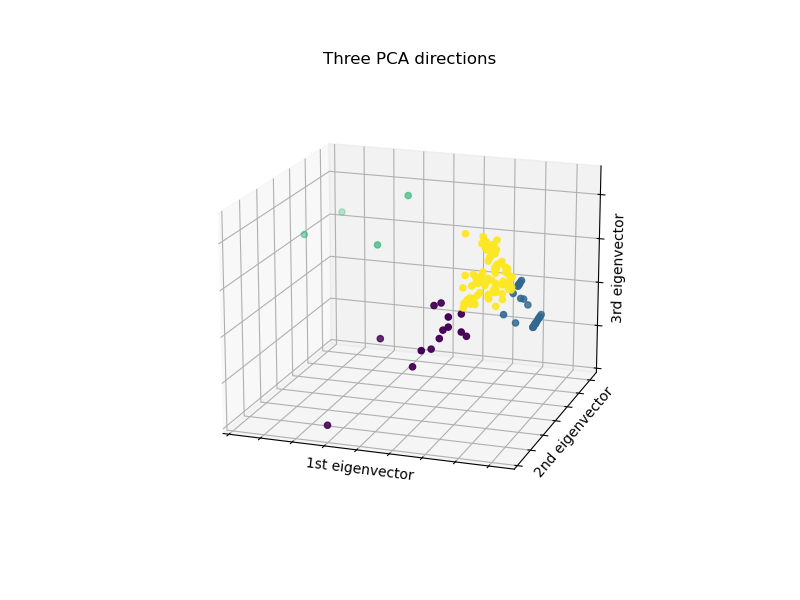

In [336]:
# Create proxy artists for the legend based on cluster labels (from ChatGPT)
proxy_artists = []
for label in range(4):  # Assuming you have 4 clusters
    color = plt.cm.tab10(label / 4.0)  # Use the same color mapping as the scatter plot
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', markersize=8, markerfacecolor=color, label=f'Cluster {label}'))


# Plot the figure
fig2 = plt.figure(2, figsize=(8,6))
ax2 = fig2.add_subplot(111, projection="3d", elev=-150, azim=110)
ax2.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=labels.astype(float))

ax2.set_title("Three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.xaxis.labelpad = -11  # Decrease the space between x-axis label and axis
ax2.xaxis.set_ticklabels([])

ax2.set_ylabel("2nd eigenvector")
ax2.yaxis.set_ticklabels([])
ax2.yaxis.labelpad = -11  # Decrease the space between y-axis label and axis

ax2.set_zlabel("3rd eigenvector")
ax2.zaxis.set_ticklabels([])
ax2.zaxis.labelpad = -11  # Decrease the space between z-axis label and axis

# ax2.legend(handles=proxy_artists)

plt.show()

In [334]:
# plt.savefig("/Users/seungbinjoo/Desktop/PCA_k_means_pristine.png", dpi=500)  # You can change the format and resolution as needed

In [337]:
plt.close()

How do we determine how many clusters are a good idea? We can use silhouette score as a measure of model performance. Try different number of clusters and see how the silhouette score behaves depending on cluster number.

In [15]:
# Create a for loop which tests various values of k for k-mean clustering
from sklearn.metrics import silhouette_score

# Initialise
K = range(2,8)
fits = [] # where we will store fitted data
score = [] # where we will store score of each fitted data set

for k in K:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init='auto')
    hits_clusters = kmeans.fit(acoustic_hits_reduced)
    
    # Append fit to the fits list
    fits.append(hits_clusters)
    
    # Append silhouette score to the score list
    score.append(silhouette_score(acoustic_hits_reduced, hits_clusters.labels_, metric='euclidean'))

<IPython.core.display.Javascript object>


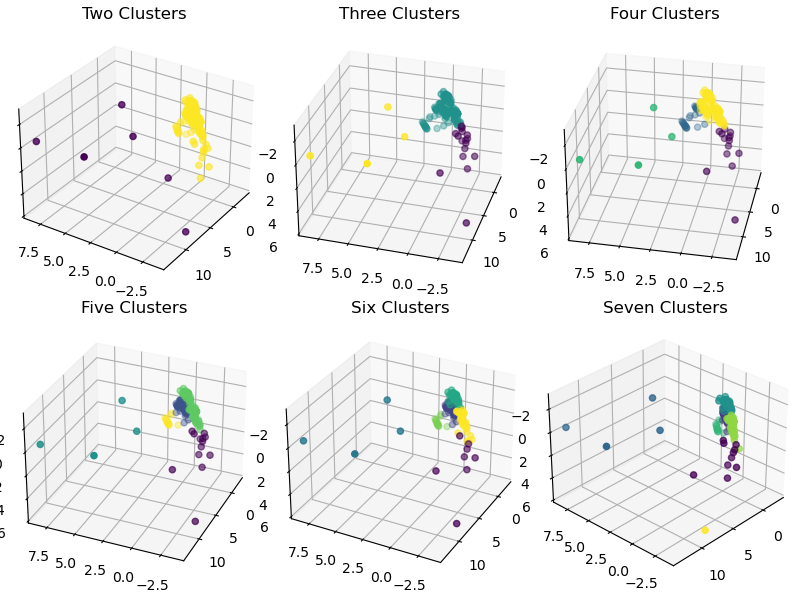

In [16]:
# Visualising all the different number of clusters
fig3 = plt.figure(3, figsize=(8,6))
fig3.tight_layout()

ax3 = fig3.add_subplot(2, 3, 1, projection="3d", elev=-150, azim=110)
ax3.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[0].labels_.astype(float))

ax4 = fig3.add_subplot(2, 3, 2, projection="3d", elev=-150, azim=110)
ax4.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[1].labels_.astype(float))

ax5 = fig3.add_subplot(2, 3, 3, projection="3d", elev=-150, azim=110)
ax5.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[2].labels_.astype(float))

ax6 = fig3.add_subplot(2, 3, 4, projection="3d", elev=-150, azim=110)
ax6.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[3].labels_.astype(float))

ax7 = fig3.add_subplot(2, 3, 5, projection="3d", elev=-150, azim=110)
ax7.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[4].labels_.astype(float))

ax8 = fig3.add_subplot(2, 3, 6, projection="3d", elev=-150, azim=110)
ax8.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=fits[5].labels_.astype(float))

ax3.set_title("Two Clusters")
ax4.set_title("Three Clusters")
ax5.set_title("Four Clusters")
ax6.set_title("Five Clusters")
ax7.set_title("Six Clusters")
ax8.set_title("Seven Clusters")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [17]:
plt.close()

<IPython.core.display.Javascript object>


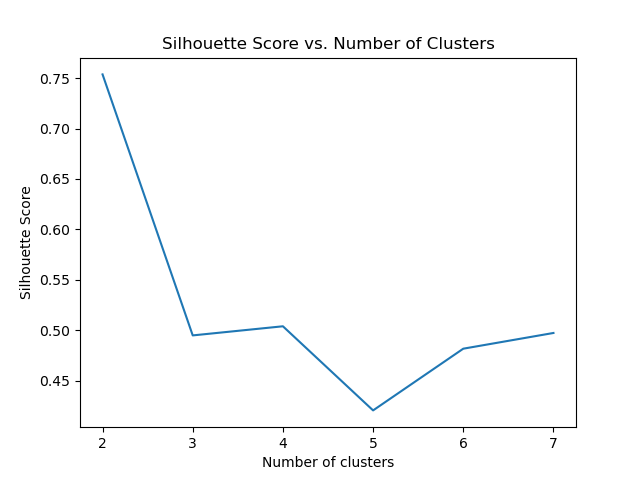

Text(0, 0.5, 'Silhouette Score')

In [18]:
# Plot silhouette score vs number of clusters
fig, ax0 = plt.subplots()
plt.plot(K,score)

ax0.set_title("Silhouette Score vs. Number of Clusters")
ax0.set_xlabel('Number of clusters')
ax0.set_ylabel('Silhouette Score')

In [19]:
plt.close()

Recall: "A high silhouette score indicates that the clusters are well separated, and each sample is more similar to the samples in its own cluster than to samples in other clusters. A silhouette score close to 0 suggests overlapping clusters, and a negative score suggests poor clustering solutions." So looking at our data, it seems like 3 clusters is most suitable (or maybe 4).

Now that we have our clusters, we want to see if there are any similarities between the waveforms in each of the clusters. To do this we need to label the data with the clusters and also relabel the data so that we know which waveform each row in the dataset corresponds to.

In [20]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
cluster_index = kmeans.fit_predict(acoustic_hits_reduced) # fit_predict gives us index of the cluster each sample belongs to

In [21]:
# Import original_data again
acoustic_hits = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/Pristine P42A Machine Learning Data.csv', delimiter =',')
original_data = acoustic_hits # just creating a copy before we make changes to the data

original_data['Cluster Index'] = cluster_index # add cluster index as the last column
original_data

Waveform Number  C-Rate  Transducer Position  Rise Time  Counts to Peak  \
0                  1    0.33                   18         12               7   
1                  2    0.33                   18          1               3   
2                  3    0.33                   18          1               1   
3                  4    0.33                   18         22               4   
4                  5    0.33                   18          1               1   
..               ...     ...                  ...        ...             ...   
135               23    1.00                   54         14               3   
136               24    1.00                   54         14               2   
137               25    1.00                   54         15               2   
138               26    1.00                   54         27               9   
139               27    1.00                   54          3               1   

     Energy  Duration  Amplitude  Average Frequency     RMS  ASL  PCNTS  \
0         0        73         37                 95  0.0004   16      3   
1         0        64         33                 46  0.0004   16      1   
2         0        64         25                 15  0.0004   16      1   
3         0        95         45                 42  0.0004   16      2   
4         0         1         31               1000  0.0004   16      1   
..      ...       ...        ...                ...     ...  ...    ...   
135       0        54         34                 55  0.0004   16      2   
136       0        28         35                 71  0.0004   16      2   
137       0        28         35                 71  0.0004   16      2   
138       0        70         39                128  0.0004   16      4   
139       0        13         31                 76  0.0004   16      1   

     Threshold  Reverberation Frequency  Initiation Frequency  \
0           29                       66                   250   
1           29                       32                  1000   
2           29                        1                  1000   
3           29                       28                    90   
4           29                     1000                  1000   
..         ...                      ...                   ...   
135         29                       26                   142   
136         29                        1                   142   
137         29                        1                   133   
138         29                      117                   148   
139         29                        1                   333   

     Signal Strength  Absolute Energy  Cluster Index  
0          1060000.0           3560.0              0  
1           888000.0           1970.0              3  
2           888000.0           1970.0              3  
3          4470000.0          41700.0              0  
4            58000.0            206.0              1  
..               ...              ...            ...  
135         836000.0           2290.0              3  
136         570000.0           2050.0              3  
137         586000.0           2140.0              3  
138        2230000.0          12300.0              0  
139         363000.0           1110.0              3  

[140 rows x 18 columns]

In [22]:
# Save this data that includes clustering of the original data
original_data.to_csv('pristine_cell_HITS_clustered_data_using_pca.csv')

Looking over all the waveforms and comparing similarities between waveforms in the same cluster as well as differences between waveforms in different clusters, I made the following observations:<br>
<br>**Cluster index 0:**
- Waveforms have high amplitude (peak amplitude around 0.0075 to 0.015 V, and even up to 0.04), compared to other waveforms (which usually have a peak amplitude around 0.001 to 0.004 V).
- Waveform is shaped like a strong peak and then a decay (as opposed to noise which looks like a slow sinusoidal wave)
- Waveform is not "jagged"/"jittery" (some peak-decay shaped waveforms are quite jittery, i.e. waveform line is like a step function, whereas cluster 0 waveforms tend to be smooth lines)
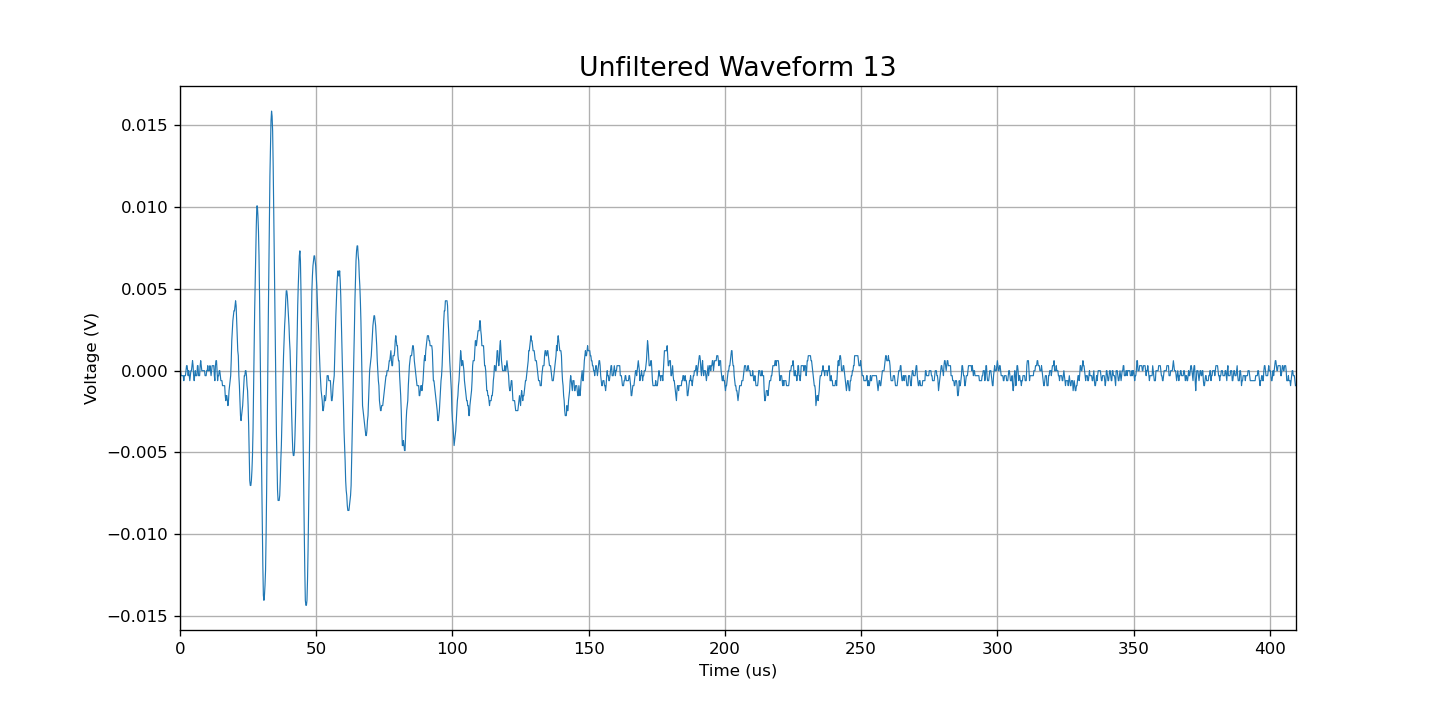

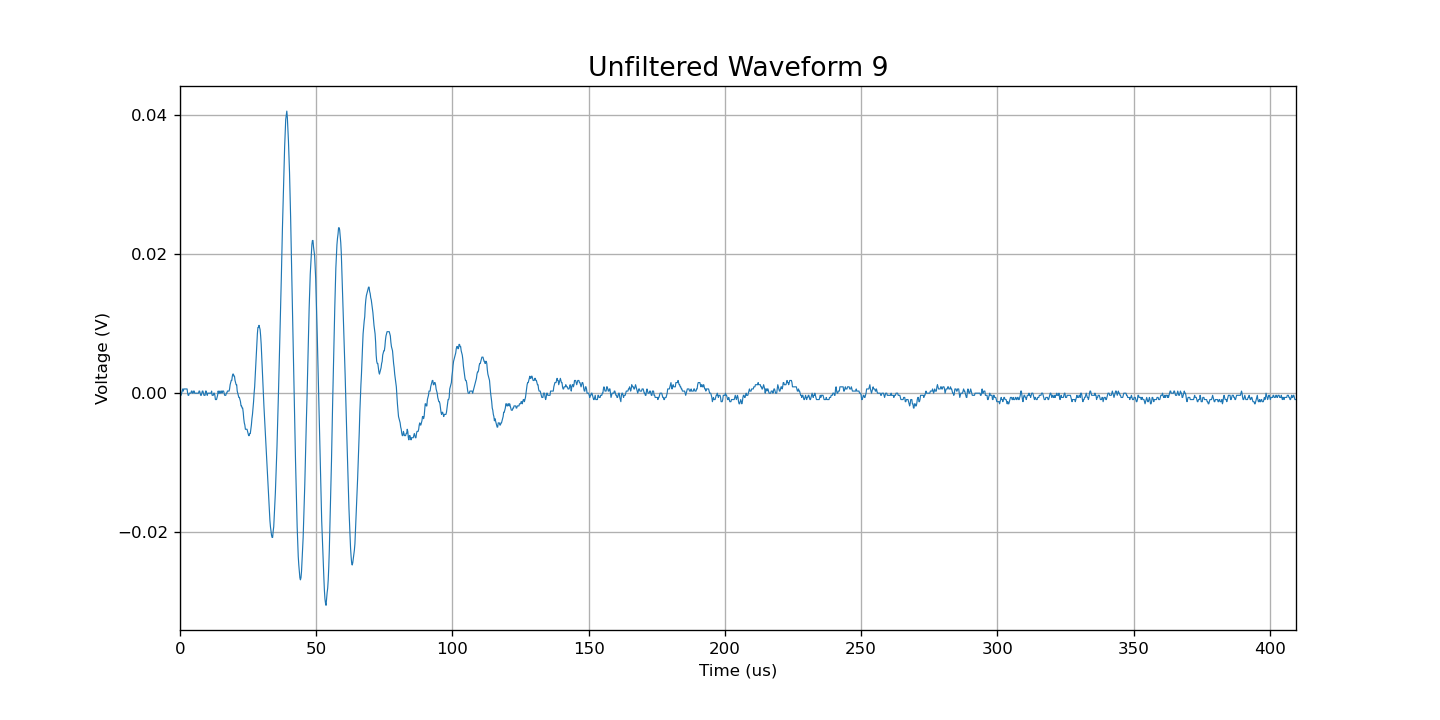
- 12 out of the 140 waveforms
- Looking at FFT, some of these waveforms have distinct frequency peaks between 250 and 300 kHz (not seen in other waveforms). However, some of the waveforms in this cluster have similar FFTs to other clusters.

**Cluster index 1:**
- A roughly half-half mix of noise waveforms and peak-decay shaped waveforms.
- All of these waveforms are relatively low amplitude (0.001 to 0.006 V).
- Waveforms are "jittery"
- 92 out of 140 waveforms

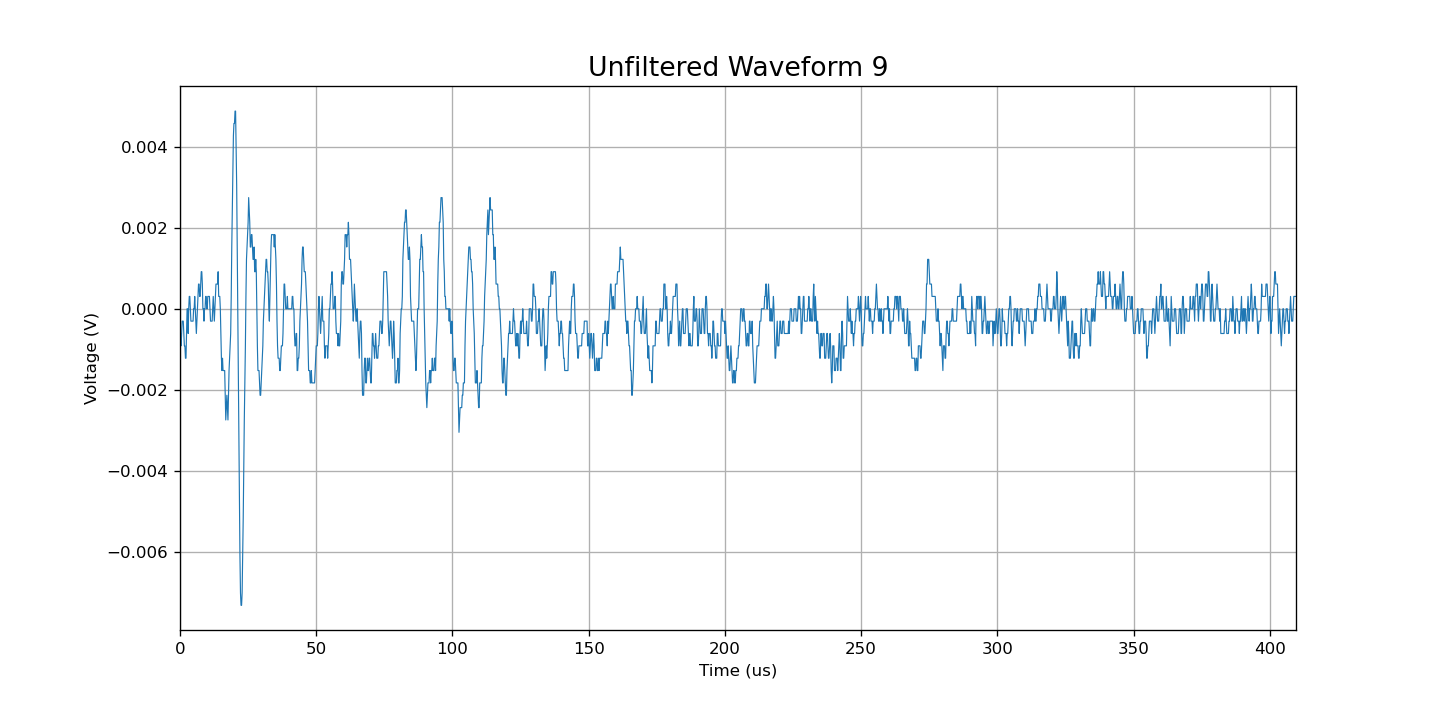

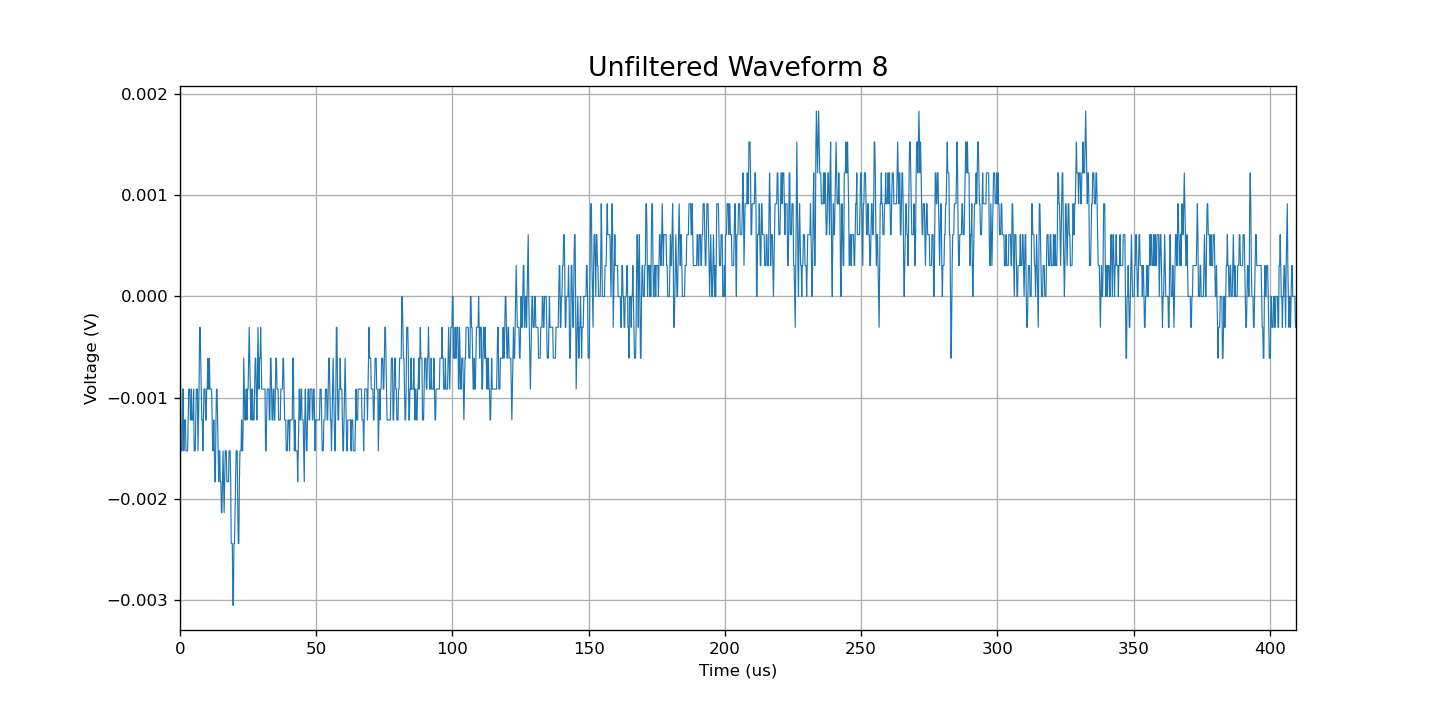

**Cluster index 2:**
- Quite similar to cluster index 1.
- Mix of noise waveforms and peak-decay shaped waveforms of relatively low amplitude.
- Waveforms are jittery.
- 28 out of 140 waveforms.
- Exception: at 1C 54 mm position there are about three waveforms which have a sustained jittery sinusoidal shape (that isn't quite as slow as the standard noise waveform shape).

**Cluster index 3:**
- Jittery sinusoidal shape of medium amplitude (0.05 to 0.01 V), different shape from the standard noise shape
- 3 out of 140

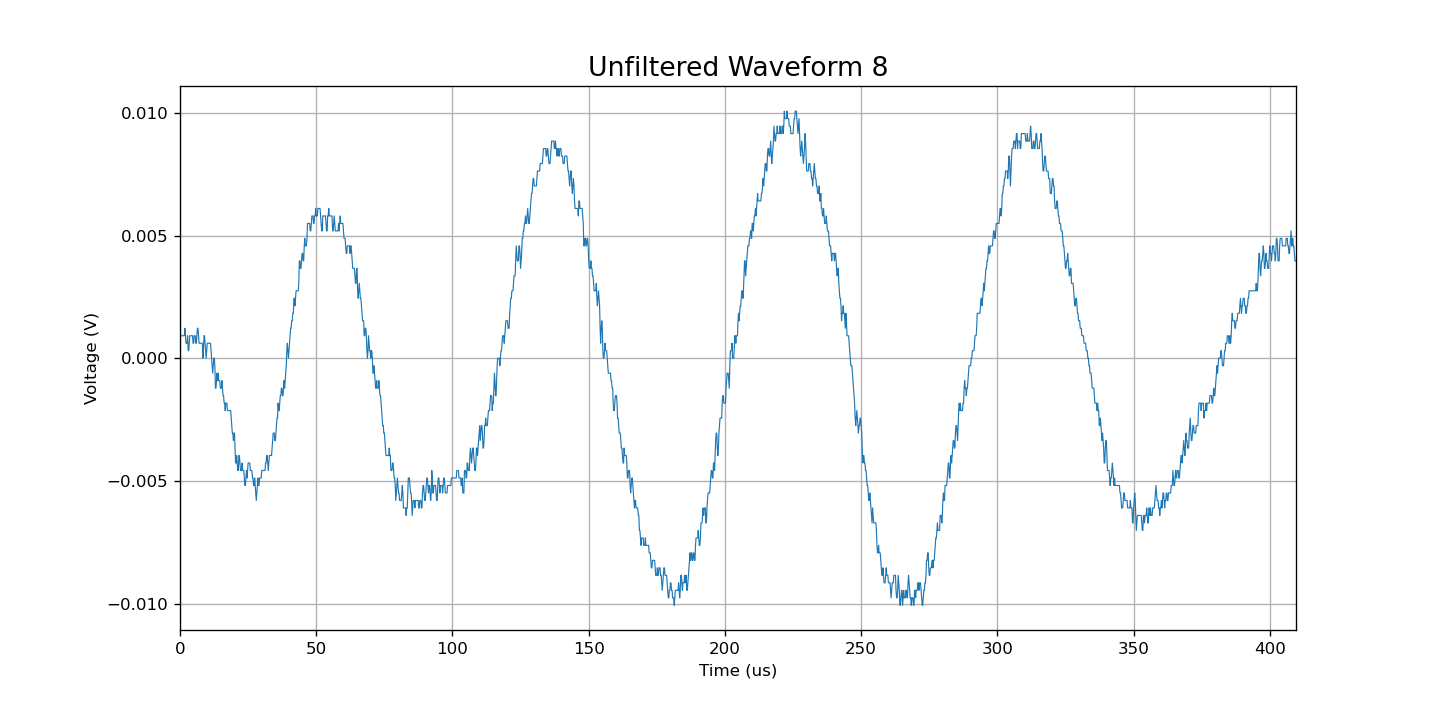

### 1.3. Analysis of Time Domain Waveform Dataset

Section 1.1 and 1.2 focused on PCA and k-means clustering with acoustic hits dataset which was exported from AEwin software. Each waveform has 15 associated parameters (used as features for the machine learning model), such as peak amplitude, average frequency, etc. However, we can also just take the time domain signal of each waveform (2048 data points for each waveform) and feed that into our PCA algorithm to reduce dimensionality and then apply k-means clustering. It may also be useful to feed FFT waveform data as an input.

In order to do this, we need to:
1. Make a csv file where each row corresponds to an AE hit waveform and each column represents voltage at a certain point in time data
2. Access each unfiltered waveform csv file, extract the voltage data from the second column
3. Reshape this column into a row.
4. Then insert this row into the csv file made in step 1.
5. Repeat for all unfiltered waveforms (at different C-rates, different transducer positions, etc).

In [23]:
import csv
import os
from pandas import *

# Initialise
header = []

# Make a column for each voltage value in point of time
for i in range(2048):
    header.append('t=' + str(i*0.2))
    i += 1

# Name of csv file
filename = 'pristine_cell_time_domain_raw_waveform_data.csv'

# List of experiment folders which contains waveforms that we want to feed into our ML model. Note: folder list needs to be in the same order as the way we organized the acoustic_hits dataframe
folders = ['/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Cylindrical Cell AE Matrix Experiment Pristine Cby3',
           '/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Cylindrical Cell AE Matrix Experiment Pristine 1C']

# Writing to csv file
with open(filename,'w') as csvfile:
    
    # Create a csv writer object
    csvwriter = csv.writer(csvfile)
    
    # Writing the header
    csvwriter.writerow(header)
    
    # Nested for loop
    # Accessing each experiment folder
    for folder in folders:
        waveform_folders_dir = os.path.join(folder,'Processed Data', 'Waveforms Processed')
        waveform_folders = [f for f in os.listdir(waveform_folders_dir) if f != '.DS_Store']
        waveform_folders.sort()
        
        # Accessing each transducer position folder in each experiment folder + accessing unfiltered waveform folder
        for waveform_folder in waveform_folders:
            csv_folder_dir = os.path.join(waveform_folders_dir, waveform_folder)
            csv_folder = os.path.join(csv_folder_dir, 'Unfiltered Waveform')
            csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv') and f != '.DS_Store']
            csv_files.sort()
            
            # Accessing each waveform csv file in each unfiltered waveform folder
            for csv_file in csv_files:
                
                # Full file path to particular csv file
                csv_file_path = os.path.join(csv_folder, csv_file)
                
                # Read voltage data from csv into a list
                data = read_csv(csv_file_path)
                voltage_data = data['Voltage (V)'].tolist()
                
                # Write voltage data to our target csv file
                csvwriter.writerow(voltage_data)


Our csv data frame is now ready to be fed into our machine learning model:

Important issue: we need to label the waveforms so that we can identify them after applying the model. However, the ordering of the waveforms in the csv data frame is a bit messed up. Fix this!

In [24]:
acoustic_waveforms = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/2 Code/My code/pristine_cell_time_domain_raw_waveform_data.csv', delimiter =',')
acoustic_waveforms

t=0.0     t=0.2     t=0.4  t=0.6000000000000001     t=0.8     t=1.0  \
0   -0.000610 -0.000305 -0.000305             -0.000610 -0.000916 -0.000916   
1   -0.001526 -0.001221 -0.000916             -0.000610 -0.000916 -0.001221   
2   -0.001221 -0.001526 -0.001526             -0.001831 -0.001831 -0.001526   
3    0.000305  0.000000 -0.000305             -0.000305 -0.000305 -0.000305   
4   -0.000305 -0.000305  0.000000              0.000305 -0.000305 -0.000610   
..        ...       ...       ...                   ...       ...       ...   
135 -0.001526 -0.001831 -0.001831             -0.001221 -0.000916 -0.001221   
136 -0.002136 -0.001831 -0.001221             -0.001221 -0.000610  0.000000   
137 -0.000916 -0.000610 -0.000305             -0.000305 -0.000610 -0.000610   
138  0.000305  0.000305  0.000000              0.000000  0.000305  0.000000   
139 -0.000305  0.000000  0.000000             -0.000305 -0.000305  0.000305   

     t=1.2000000000000002  t=1.4000000000000001     t=1.6     t=1.8  ...  \
0               -0.001221             -0.001221 -0.000916 -0.000305  ...   
1               -0.001831             -0.001831 -0.001221 -0.000916  ...   
2               -0.001221             -0.000610 -0.000305 -0.000610  ...   
3               -0.000305             -0.000610 -0.000305 -0.000305  ...   
4                0.000000              0.000000 -0.000305 -0.000610  ...   
..                    ...                   ...       ...       ...  ...   
135             -0.001526             -0.001526 -0.001221 -0.001526  ...   
136              0.000610              0.000916  0.001221  0.001526  ...   
137             -0.000916             -0.000916 -0.000610 -0.000610  ...   
138              0.000000             -0.000305 -0.000305 -0.000305  ...   
139              0.000000              0.000000 -0.000305 -0.000610  ...   

      t=407.6   t=407.8   t=408.0  t=408.20000000000005  t=408.40000000000003  \
0   -0.000610  0.000000 -0.000305             -0.000610             -0.000305   
1    0.000610  0.000305  0.000000              0.000000              0.000305   
2   -0.000305 -0.000305 -0.000305              0.000305              0.000610   
3   -0.000916 -0.000610 -0.000305              0.000000              0.000000   
4   -0.000916 -0.000916 -0.000916             -0.000916             -0.000610   
..        ...       ...       ...                   ...                   ...   
135  0.000000  0.000000 -0.000305             -0.000305             -0.000305   
136 -0.000610 -0.000305 -0.000305             -0.000610             -0.000610   
137 -0.001526 -0.001526 -0.001221             -0.001831             -0.002136   
138 -0.000305 -0.000305  0.000000              0.000000              0.000000   
139  0.000610  0.000305  0.000305              0.000610              0.000916   

      t=408.6   t=408.8   t=409.0  t=409.20000000000005  t=409.40000000000003  
0   -0.000305 -0.000916 -0.000916             -0.000610             -0.000305  
1    0.000305  0.000305  0.000000              0.000000              0.000305  
2    0.000610  0.000610  0.000305              0.000305              0.000000  
3   -0.000305 -0.000305 -0.000305             -0.000610             -0.000916  
4   -0.000305 -0.000916 -0.001221             -0.000916             -0.000916  
..        ...       ...       ...                   ...                   ...  
135 -0.000610 -0.000305 -0.000610             -0.000610             -0.000305  
136 -0.000610 -0.000305  0.000000              0.000000             -0.000305  
137 -0.002136 -0.002136 -0.002441             -0.002136             -0.001831  
138  0.000305  0.000305  0.000000              0.000305              0.000610  
139  0.000610  0.000305  0.000305              0.000610              0.000305  

[140 rows x 2048 columns]

It is good to do a sanity check at this point. We have 140 rows corresponding to 140 waveforms and 2048 columns corresponding to 2048 voltage-time data points for each waveform. Now, we can apply PCA:

In [25]:
# Normalisation of the data
std_scaler = StandardScaler()
scaled_acoustic_waveforms = std_scaler.fit_transform(acoustic_waveforms)

# Applying PCA
pca2 = PCA(n_components=4) # We want to reduce dimensionality to 4
acoustic_waveforms_reduced = pca2.fit_transform(scaled_acoustic_waveforms) # Fit the model with data and apply the dimensionality reduction on data
acoustic_waveforms_reduced

array([[-3.80720655e+00, -2.25867062e+00, -6.66750038e+00,
         2.64791398e+00],
       [-3.90244018e+00, -1.71423784e+00, -1.01265171e+01,
         3.52554226e+00],
       [-3.55540944e+00, -5.25717118e+00, -2.06772295e+01,
         6.21426826e+00],
       [-2.80643321e+00,  1.49244955e+00,  7.70719230e+00,
        -1.17238637e+00],
       [ 2.10221161e-01,  2.58947272e+00,  1.95085892e+01,
        -8.40658882e+00],
       [-4.18738130e+00, -6.58774729e-01, -1.79683492e+00,
         4.14030340e+00],
       [-4.03712058e+00,  2.48538354e+00, -3.67307624e+00,
        -1.55577819e+00],
       [-1.23934959e+00,  1.62596346e+00,  9.70184175e+00,
        -3.73564798e+00],
       [-5.95368470e-01,  4.70059013e+00,  1.96396802e+01,
        -6.35950253e+00],
       [-2.52325545e+00,  1.58077948e+00,  1.36410395e+01,
         2.63586237e+00],
       [-7.53923050e-01, -2.46069119e-01,  5.64834812e+00,
        -1.13522283e-01],
       [-1.64742860e+00, -9.71507601e-01,  1.07144615e+00,
      

In [26]:
# explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures.
# So we can sum up the ratios to get the total variance in the chosen number of components.
print(sum(pca2.explained_variance_ratio_))

0.5084119769013689


Sum of explained variance ratio for 3 principal components was only 0.4419. Therefore, I decided to add another principal component for a total of four principal components with an explained variance ratio sum of 0.50.

Visualising four dimensional data is a bit trickier. The code below plots four three dimensional plots to represent the four principal components:

<IPython.core.display.Javascript object>


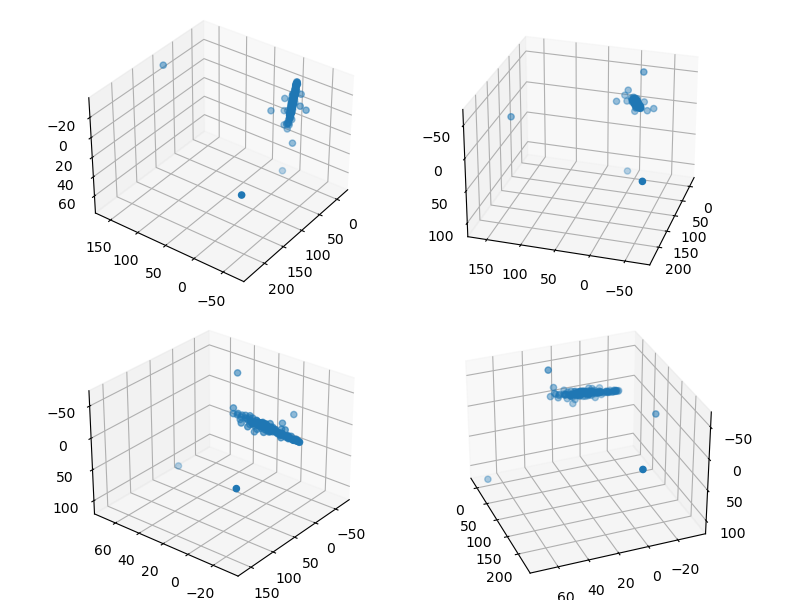

In [27]:
# Visualizing the principal components and how our transformed data set points map onto that space
fig4 = plt.figure(4, figsize=(8,6))
fig4.tight_layout()

ax9 = fig4.add_subplot(2, 2, 1, projection="3d", elev=-150, azim=110)
ax9.scatter(
    acoustic_waveforms_reduced[:,0],
    acoustic_waveforms_reduced[:,1],
    acoustic_waveforms_reduced[:,2])

ax10 = fig4.add_subplot(2, 2, 2, projection="3d", elev=-150, azim=110)
ax10.scatter(
    acoustic_waveforms_reduced[:,0],
    acoustic_waveforms_reduced[:,1],
    acoustic_waveforms_reduced[:,3])

ax11 = fig4.add_subplot(2, 2, 3, projection="3d", elev=-150, azim=110)
ax11.scatter(
    acoustic_waveforms_reduced[:,1],
    acoustic_waveforms_reduced[:,2],
    acoustic_waveforms_reduced[:,3])

ax12 = fig4.add_subplot(2, 2, 4, projection="3d", elev=-150, azim=110)
ax12.scatter(
    acoustic_waveforms_reduced[:,0],
    acoustic_waveforms_reduced[:,2],
    acoustic_waveforms_reduced[:,3])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [28]:
plt.close()

Having done PCA and visualising it our data is quite cluttered in a small space and the separation of clusters isn't as clear as it was in section 1.1 and 1.2. Nevertheless, proceeding with k-means clustering:

<IPython.core.display.Javascript object>


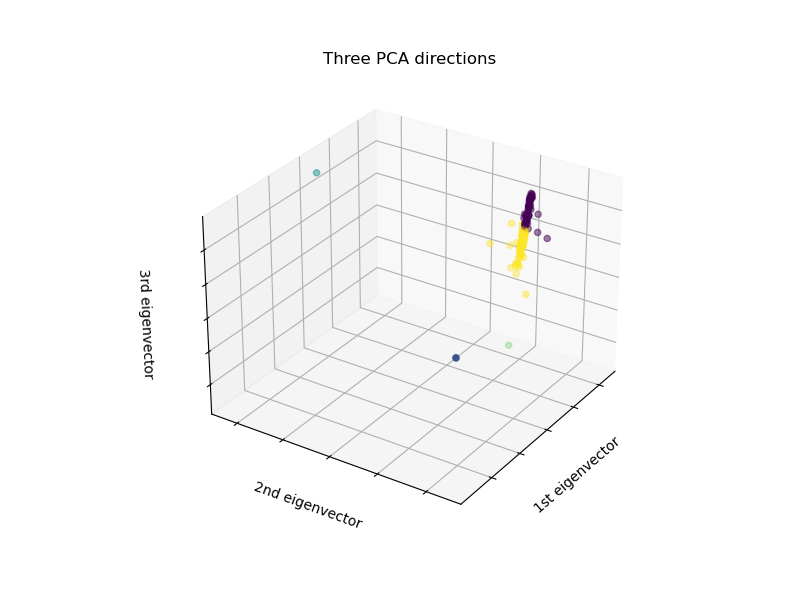

In [29]:
# k-means clustering
kmeans2 = KMeans(n_clusters = 5, random_state = 0, n_init='auto') # set up algorithm
waveforms_clusters = kmeans2.fit(acoustic_waveforms_reduced) # fit data using model
labels2 = waveforms_clusters.labels_ # get labels from clustering analysis

# Plot the figure
fig5 = plt.figure(5, figsize=(8,6))
ax13 = fig5.add_subplot(111, projection="3d", elev=-150, azim=110)
ax13.scatter(
    acoustic_waveforms_reduced[:,0],
    acoustic_waveforms_reduced[:,1],
    acoustic_waveforms_reduced[:,2],
    c=labels2.astype(float))

ax13.set_title("Three PCA directions")
ax13.set_xlabel("1st eigenvector")
ax13.xaxis.set_ticklabels([])
ax13.set_ylabel("2nd eigenvector")
ax13.yaxis.set_ticklabels([])
ax13.set_zlabel("3rd eigenvector")
ax13.zaxis.set_ticklabels([])

plt.show()

In [30]:
plt.close()

Clustering is very suboptimal. Most points are in a relatively small concentrated space and three of the clusters each contain only one point. For reference, the silhouette score was calculated:

In [31]:
score = silhouette_score(acoustic_waveforms_reduced, waveforms_clusters.labels_, metric='euclidean')
print(score)

0.4586070360592341


## 2. Autoencoders and k-means Clustering Method with Pristine Cell Data

The dataset we are working with in section 2 is also all from pristine cell cycling (C/3 and 1C). It excludes background noise data collection.

### 2.1. Introduction to Deep Learning

Notes from [MIT Introduction to Deep Learning | 6.S191](https://www.youtube.com/watch?v=QDX-1M5Nj7s):
- Neural networks are made out of single neurons called perceptrons.
- The forward propagation of a perceptron is shown below:
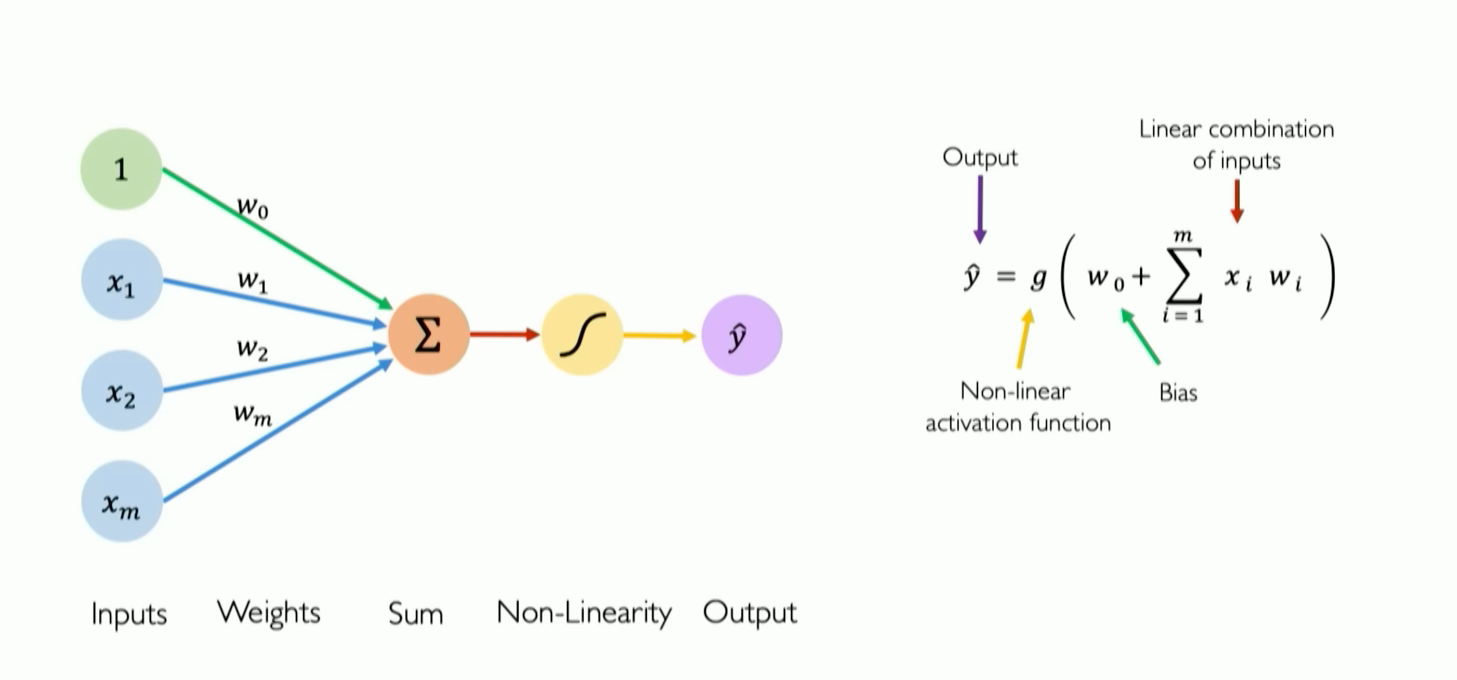
- Bias allows us to shift the non-linear activation function.
- We can also express the mathematics of a perceptron in vector notation:

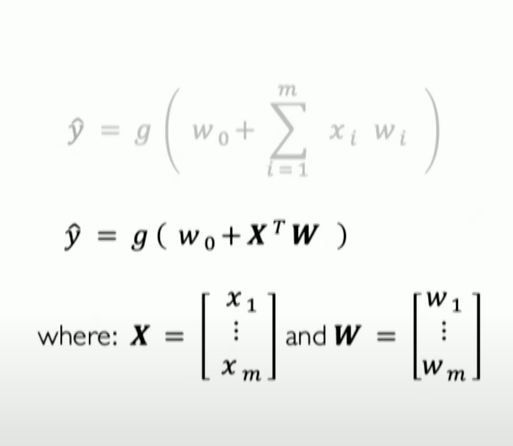
- Examples of non-linear activation function includes: sigmoid, hyperbolic tangent and ReLU
- We need non-linear activation function introduc non-linearities into the network. Our data may be highly non-linear and in order to capture those patterns with a non-linear model.
- We can stack perceptrons in layers to get a neural network.

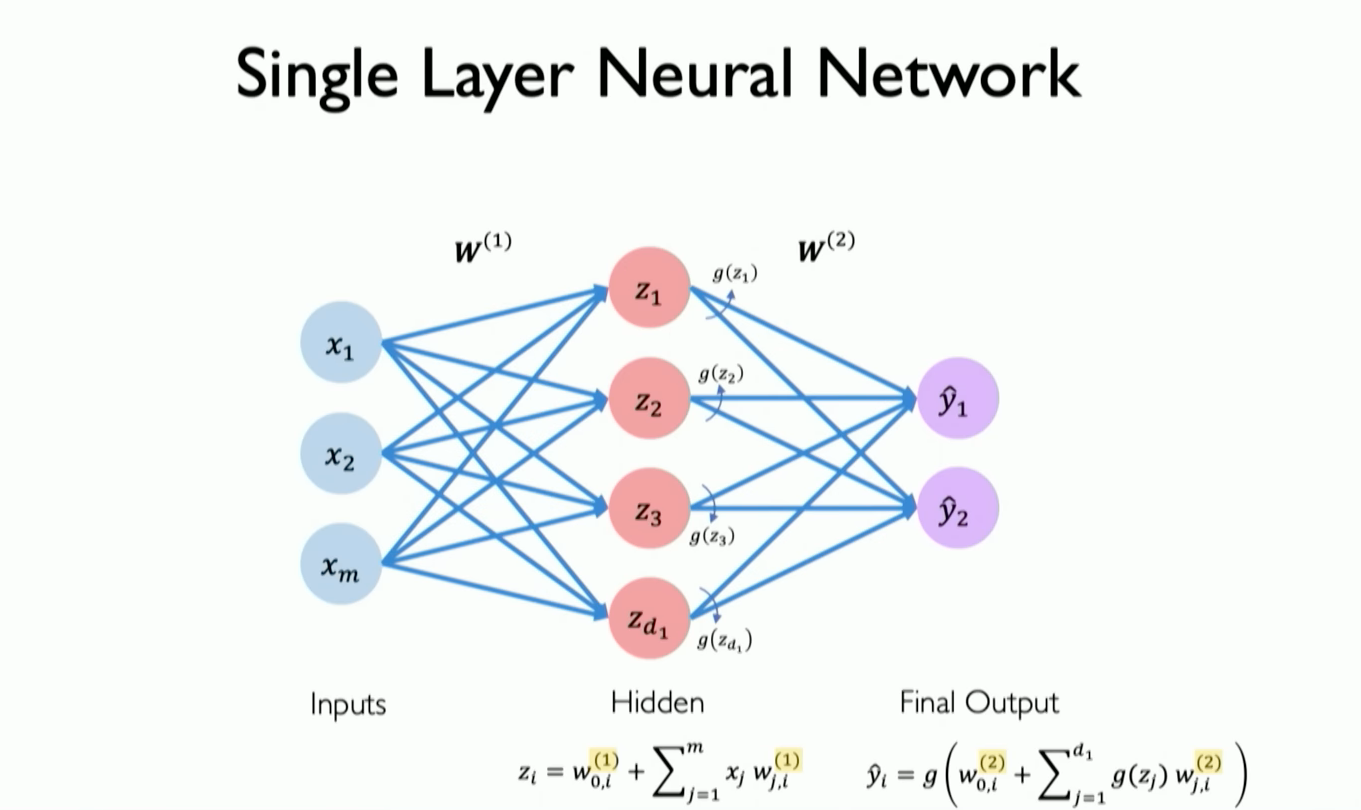
- Deep neural network: network has more than one hidden layer.
- A neural network must be trained: we need to make a loss function (aka cost function, objective function) which takes a prediction and the actual truth and tells us how big of a loss there is.
- [Loss function](https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/#:~:text=A%20loss%20function%20is%20a,well%20it%20fits%20the%20data.) depends on data we're dealing with (if it's binary classification, we can usee binary cross entropy loss; if it's a continuous variable, we can use mean square loss)

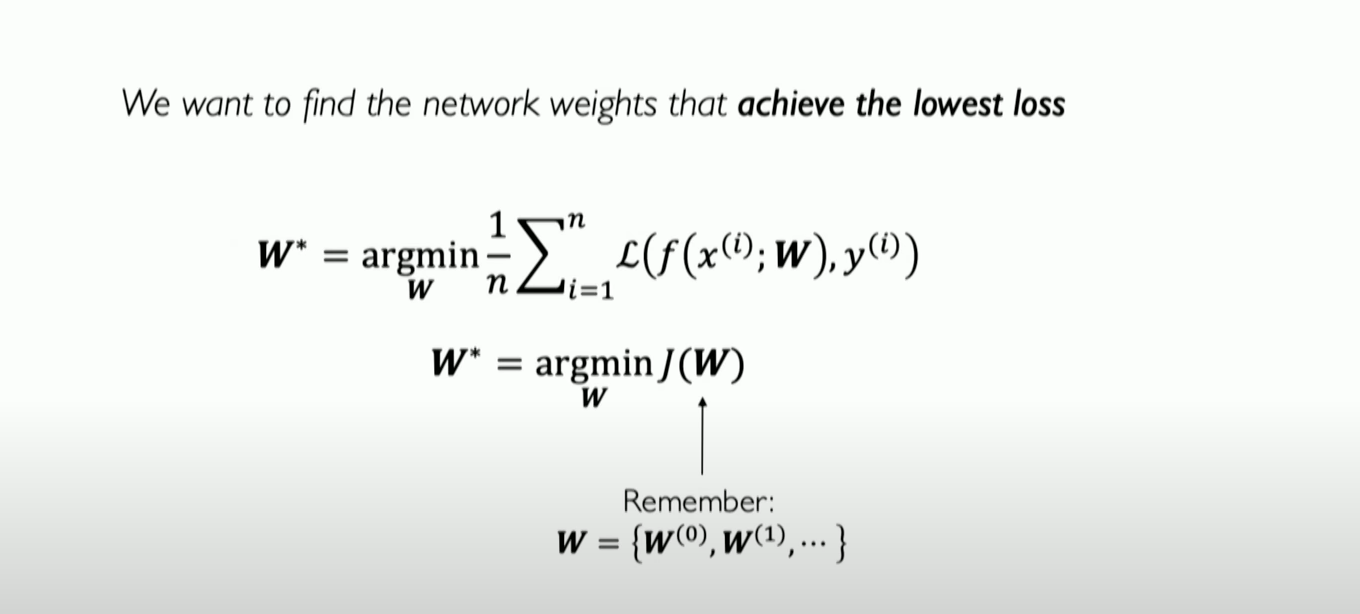
- To minimize our loss function we use gradient descent: (initialise weights randomly, compute gradient, update weights by taking a step towards the opposite direction of the gradient, continue this process until we converge to a loss function minimum, the weights at the end will be the set of weights which minimise our loss).
- To compute the gradient, we use back propagation (which is essentially the chain rule):

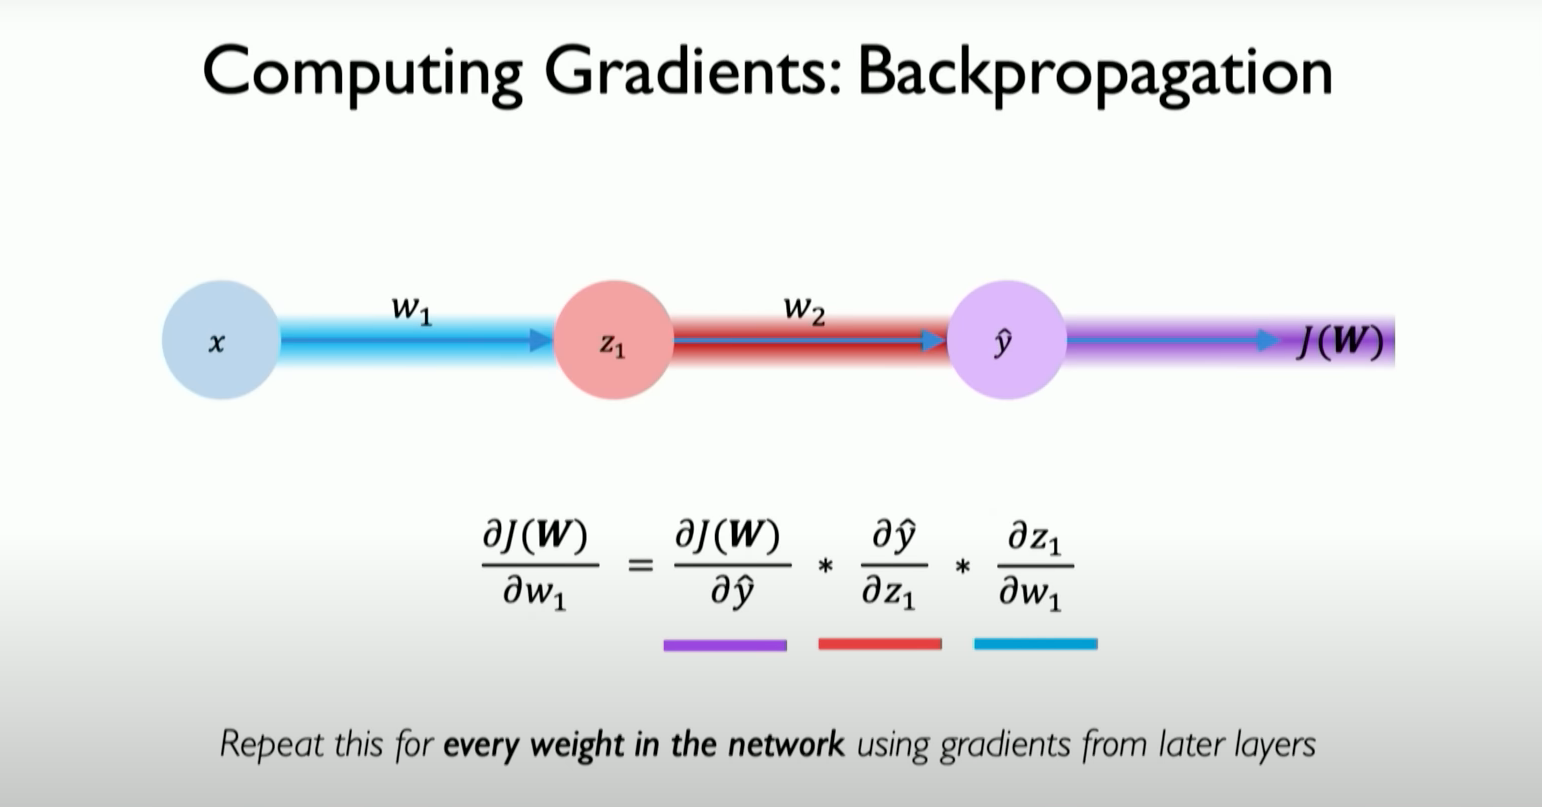
- Oftentimes, in real life, neural networks have very complex loss functions and computing the gradient and finding the minimum of the loss function is difficult.
- The learning rate is how much we step in the direction opposite of the gradient in our gradient descent algorithm.
- Small learning rate might take a long time and also converge on a local minimum.
- Large learning rate might overshoot our minimum and diverge.
- Nowadays, we use adaptive learning rates in various gradient descent algorithms (SGD, Adam, Adadelta, Adagrad, RMSProp).

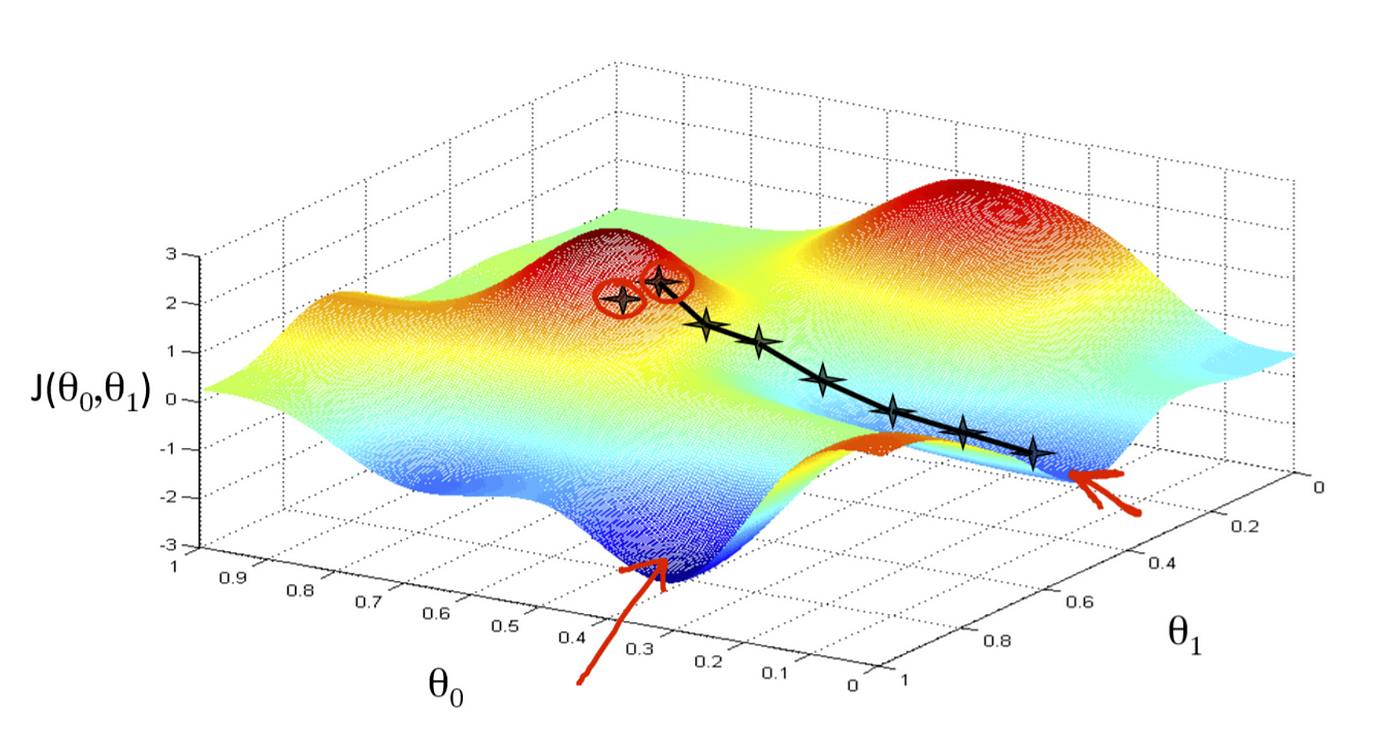
- Neural networks may overfit: our neural network is too complex, learns the patterns of the training data too well and does not perform well on testing data because it does not generalise well
- To address this problem, we have regularisation, which discourages complex models.
- Dropout is a regularisation technique.
- In dropout, we randomly select a subset of neurons and turn them off (set their activations to 0). This forces the network to not rely on any one node. On every iteration, it is exposed to a different model internally than what is was exposed to in the previous iteration.
- Early stopping is also a regularisation technique.
- This is simply stopping training before we have a chance to overfit (track the loss for training dataset and testing dataset). Stop the neural network training when the loss of the test data starts to increase as this means we're overfitting.
- [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/keras/classification)

###  2.2. Introduction to Autoencoders

Autoencoders are an unsupervised learning technique that can be used for non-linear dimensionality reduction. In an (undercomplete) autoencoder, a neural network architecture is designed such that there is a hidden layer with a "bottleneck", forcing the original representation of the data to be "compressed" as the amount of information that can flow through the network is limited. An autoencoder is composed of an input layer, multiple hidden layers and an output layer. An unlabelled dataset is fed to the input layer, and the autoencoder is tasked with reconstructing the original input at the output layer. The autoencoder is trained to minimize the reconstruction error, i.e. the difference between the input and output layer. The idea is that: "by penalizing the network according to the reconstruction error, our model can learn the most important attributes of the input data and how to best reconstruct the original input from an 'encoded' state. Ideally, this encoding will learn and describe latent attributes of the input data."

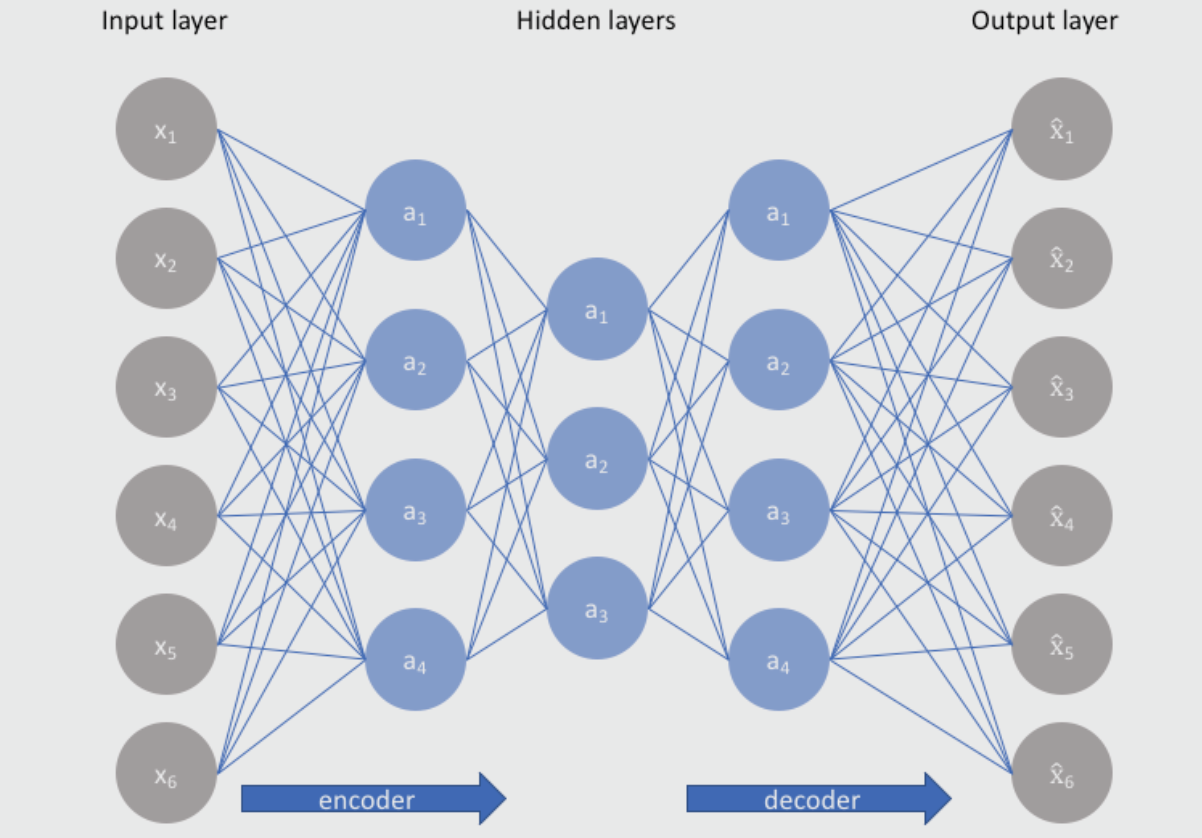

Autoencoders can be thought of as a generalisation of PCA dimensionality reduction. PCA computes lower dimensional hyperplanes to describe the original dataset; however, autoencoders can use nonlinear manifolds to describe our original data. This is useful since a lot of complex real world data is non-linear.

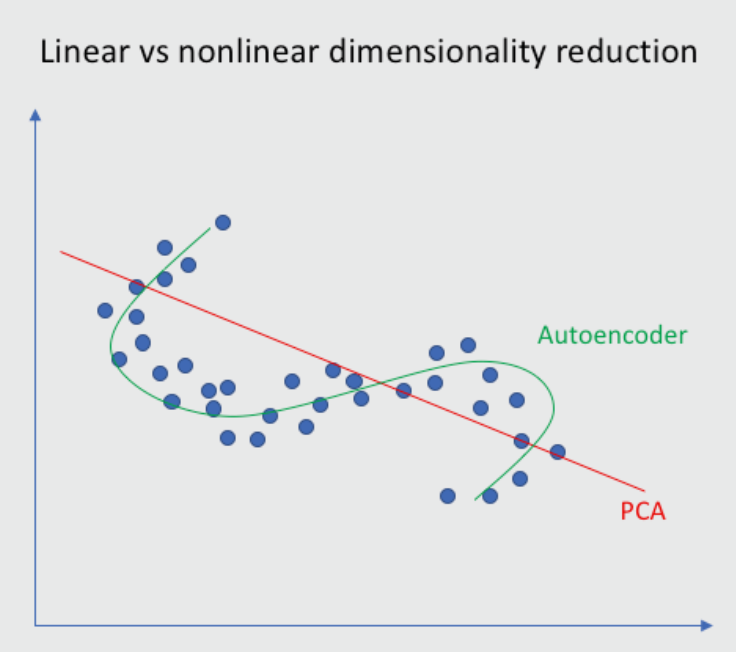

In the above diagram, we have two features representing a two dimensional space. Notice how the blue points are not just random noise (two features are not independent of each other). That is, the data has structure. The autoencoder has used this structure to represent our two dimensional data onto a one dimensional line. Whereas, autoencoders can nonlinearly do this, PCA can only do it linearly. Similarly, in 3 dimensions, an autoencoder could create a non linear manifold that represents are 3D data structure, whereas PCA would only be able to create linear manifolds:

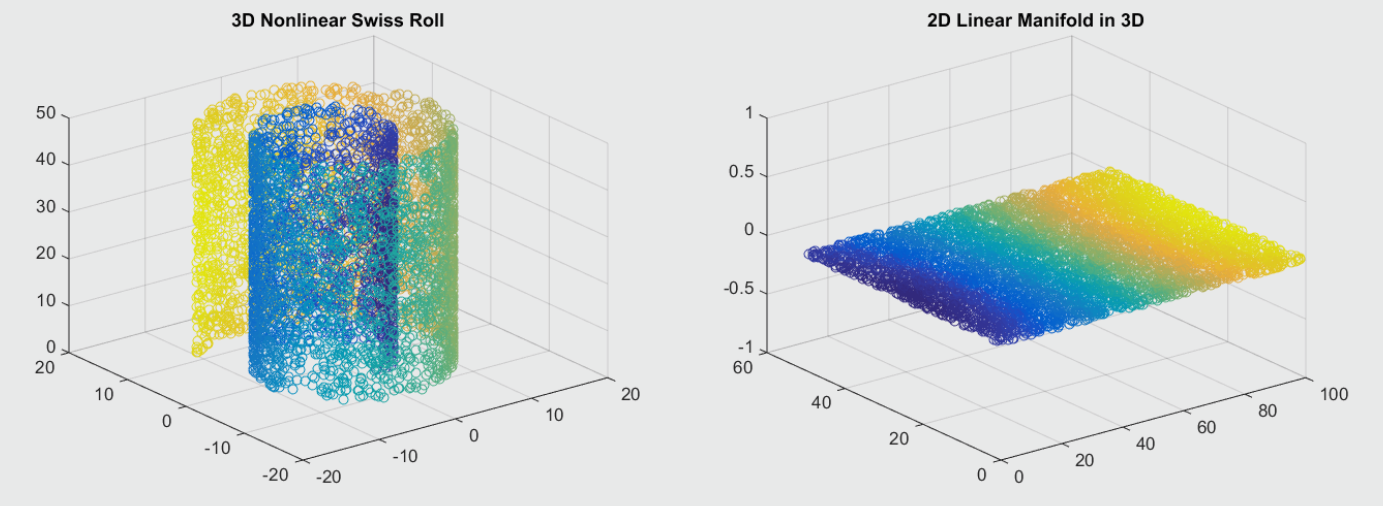

The challenge with autoencoders is that we need our network to be:
- "Sensitive to the inputs enough to accurately build a reconstruction.
- Insensitive enough to the inputs that the model doesn't simply memorize or overfit the training data."

Hyperparameters to set for an autoencoder:
1. Code size (size of bottleneck): As a rule of thumb, the smaller the bottleneck, the smaller the chance that our data will be overfitted. But also, a smaller bottleneck means that data is being more compressed.
2. Number of layers: more depth means increased complexity but the model takes longer to train.
3. Number of nodes per layer: this defines the weights we use per layer.
4. Reconstruction loss: loss function used in autoencoder depends on what kind of input and output we are handling. For image data, MSE Loss and L1 loss are popular. If inputs are within range 0 and 1, as in MNIST, binary cross entropy loss is also possible.

### 2.3. k-means Clustering with Acoustic Hits Data from Autoencoder

In [5]:
# Import necessary libraries for autoencoder
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

2023-08-22 11:53:48.766420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Rename dataset
x_train = scaled_acoustic_hits

# Check that shape of the array is what we expect
print(x_train.shape)

(140, 14)


In [7]:
# Divide x_train into a pure training set and training validation set (20% of training set)
# validation_split = 0.20

# x_val = x_train[int((1-validation_split)*x_train.shape[0]):,:]
# x_train = x_train[:int((1-validation_split)*x_train.shape[0]),:]

In [62]:
# Building the encoder and decoder

# Dimension of our original input space
input_dim = 14

# Dimension of our latent space (encoding space, i.e. bottleneck)
latent_dim = 5

# ENCODER
# "The sequential model allows us to specify a neural network, precisely, sequential: from input to output,
# passing through a series of neural layers, one after the other."
encoder = Sequential([
    
    # Define layers of the neural network (nodes, activation function)
    Dense(11, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(latent_dim, activation='relu')
])

# DECODER
decoder = Sequential([
    Dense(8, activation='relu', input_shape=(latent_dim,)),
    Dense(11, activation='relu'),
    Dense(input_dim, activation=None)
])

In [63]:
# Combine encoder and decoder to build the autoencoder
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Using MSE loss function and adam optimiser
autoencoder.compile(loss='mse', optimizer='adam')

<IPython.core.display.Javascript object>


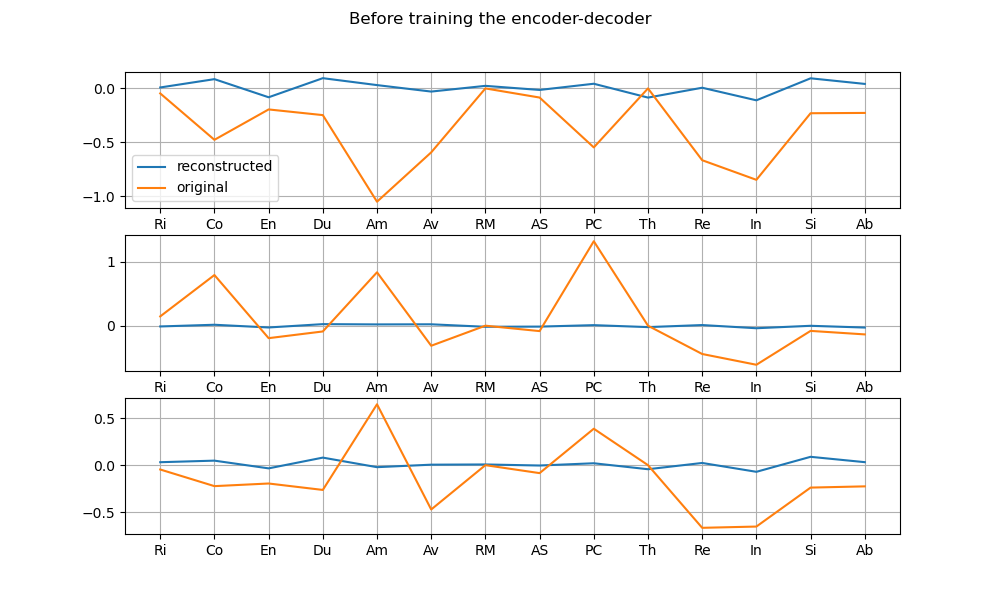

1/1 [==============================] - 0s 18ms/step


/var/folders/59/z60x1jpj5cv548__gm4sclp00000gn/T/ipykernel_5497/1253975106.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(acoustic_hits_headers_short)


In [64]:
# Plot original dataset and recontructed data set before training. We expect there to be large differences between
# the original and reconstruction as the autoencoder is not trained.

# Extract headers of acoustic hits dataset as a list of strings
acoustic_hits_headers = acoustic_hits.columns.tolist()

acoustic_hits_headers_short = []
for i in range(len(acoustic_hits_headers)):
    acoustic_hits_headers_short.append(acoustic_hits_headers[i][0:2])

# Code from https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(7, figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(acoustic_hits_headers_short)
        plt.xticks(np.arange(0, 14, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

In [65]:
plt.close()

As expected, the original dataset and reconstruction dataset do not match at all. Now we proceed to training our autoencoder neural network.

In [66]:
# Training the autoencoder
from keras.callbacks import EarlyStopping

# Early stopping stops the training of the neural network if the validation loss starts increasing (to prevent overfitting)
# If the patience parameter is set to X number of epochs or iterations, then the training will terminate only
# if there is no improvement in the monitor performance measure for X epochs or iterations in a row.
early_stopping = EarlyStopping(monitor='val_loss', patience=40)

# Batch size refers to the number of training examples used in one iteration of the model. In other words,
# it is the number of samples that are processed at once by the deep learning model during training.
model_history = autoencoder.fit(x_train, x_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

<IPython.core.display.Javascript object>


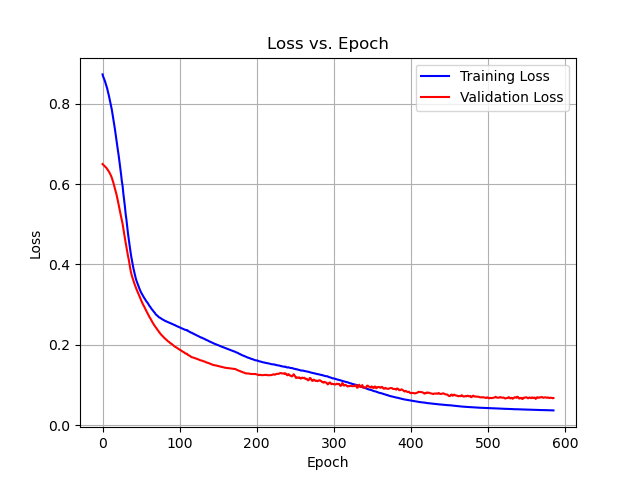

In [67]:
# Plot the loss vs. epochs of training
epochs = range(len(model_history.history['val_loss']))

fig = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

From trial and error, it was found that training to around 400-600 epochs is optimal. Both training and validation loss should get relatively close to 0.1.

In [68]:
plt.close()

<IPython.core.display.Javascript object>


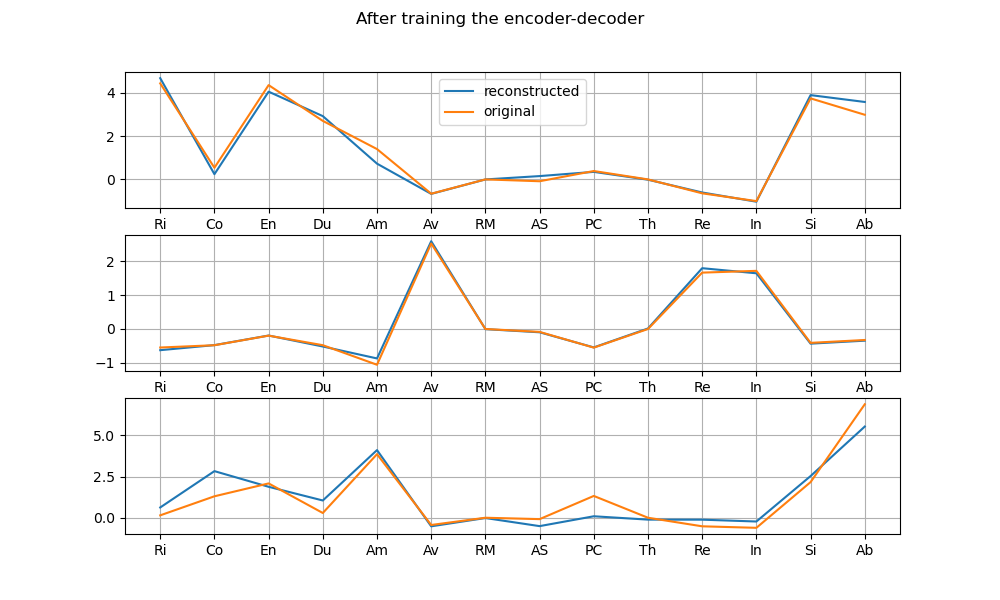

1/1 [==============================] - 0s 26ms/step


/var/folders/59/z60x1jpj5cv548__gm4sclp00000gn/T/ipykernel_5497/1253975106.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(acoustic_hits_headers_short)


1/1 [==============================] - 0s 26ms/step


In [69]:
# Difference between original dataset and reconstruction after training the neural network
plot_orig_vs_recon('After training the encoder-decoder')

In [70]:
plt.close()

After neural network training, our autoencoder succesfully and accurately reconstructs the original dataset. If we take a look at our dimension-reduced dataset in the latent space:

<IPython.core.display.Javascript object>


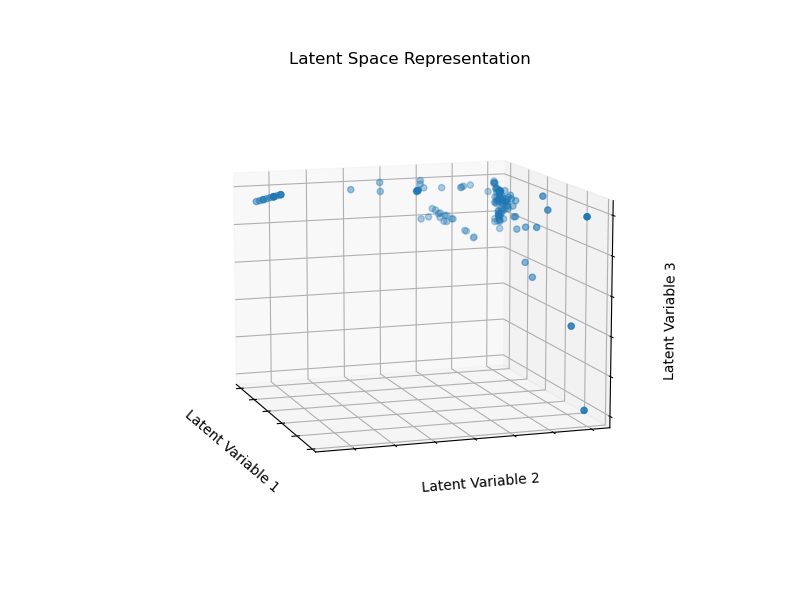

In [71]:
# 3D Plot of our latent space representation
encoded_x_train = encoder(x_train)

fig8 = plt.figure(8, figsize=(8,6))
ax13 = fig8.add_subplot(111, projection="3d", elev=-150, azim=110)
ax13.scatter(
    encoded_x_train[:,0],
    encoded_x_train[:,1],
    encoded_x_train[:,2])

ax13.set_title("Latent Space Representation")
ax13.set_xlabel("Latent Variable 1")
ax13.xaxis.set_ticklabels([])
ax13.set_ylabel("Latent Variable 2")
ax13.yaxis.set_ticklabels([])
ax13.set_zlabel("Latent Variable 3")
ax13.zaxis.set_ticklabels([])

plt.show()

In [72]:
plt.close()

Now we can apply k-means clustering to our data:

<IPython.core.display.Javascript object>


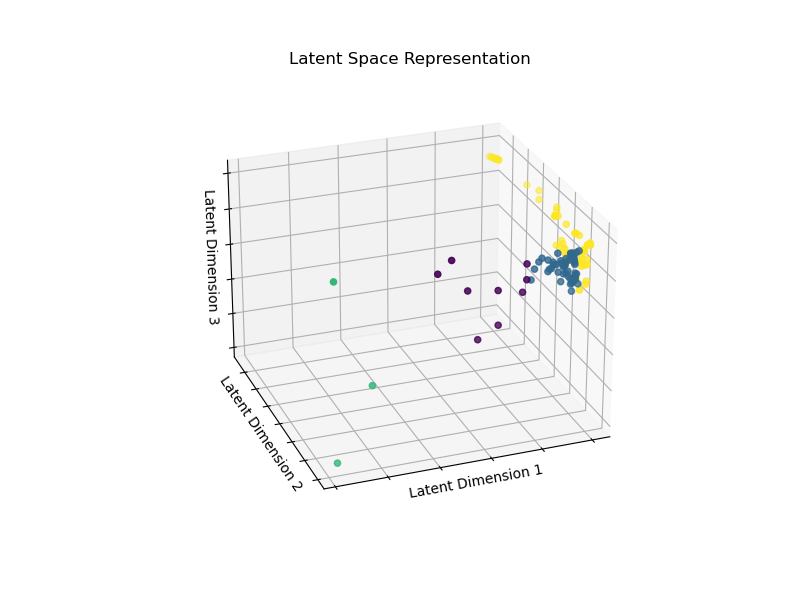

In [78]:
from sklearn.cluster import KMeans

# k-means clustering
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
autoencoder_hits_clusters = kmeans.fit(encoded_x_train) # fit data using model
labels = autoencoder_hits_clusters.labels_ # get labels from clustering analysis

# Create proxy artists for the legend based on cluster labels (from ChatGPT)
proxy_artists = []
for label in range(4):  # Assuming you have 4 clusters
    color = plt.cm.tab10(label / 4.0)  # Use the same color mapping as the scatter plot
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', markersize=8, markerfacecolor=color, label=f'Cluster {label}'))


# Plot the figure
fig9 = plt.figure(9, figsize=(8,6))
ax2 = fig9.add_subplot(111, projection="3d", elev=-150, azim=110)
ax2.scatter(
    encoded_x_train[:,0],
    encoded_x_train[:,1],
    encoded_x_train[:,2],
    c=labels.astype(float))

ax2.set_title("Latent Space Representation")
ax2.set_xlabel("Latent Dimension 1")
ax2.xaxis.labelpad = -11  # Decrease the space between x-axis label and axis
ax2.xaxis.set_ticklabels([])

ax2.set_ylabel("Latent Dimension 2")
ax2.yaxis.labelpad = -11  # Decrease the space between y-axis label and axis
ax2.yaxis.set_ticklabels([])

ax2.set_zlabel("Latent Dimension 3")
ax2.zaxis.labelpad = -11  # Decrease the space between z-axis label and axis
ax2.zaxis.set_ticklabels([])

plt.show()

In [79]:
# plt.savefig("/Users/seungbinjoo/Desktop/autoencoder_k_means.png", dpi=500)  # You can change the format and resolution as needed

In [80]:
plt.close()

Interestingly, our clustering is now quite different from our PCA analysis.

In [82]:
# Label our original dataset with these new clusters and save it
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
cluster_index = kmeans.fit_predict(encoded_x_train) # fit_predict gives us index of the cluster each sample belongs to

# Import original_data again
acoustic_hits = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/Pristine P42A Machine Learning Data.csv', delimiter =',')
original_data = acoustic_hits # just creating a copy before we make changes to the data

original_data['Cluster Index'] = cluster_index # add cluster index as the last column
original_data.to_csv('pristine_cell_HITS_clustered_data_using_autoencoder.csv')

Using the autoencoder to reduce dimensions of hits data and then using clustering sometimes gave inconclusive results. Every time the neural network is trained, the clustering gives different results. Sometimes the neural network does not train properly as validation loss starts to increase within a small number of epochs, not giving enough opportunity to train. In these cases, after clustering, checking the physical shape of the waveforms in the cluster revealed no clear consistency. Should keep tweaking hyperparemeters, e.g. number of latent dimensions, type of optimizer, training-validation split, patience for early stopping, number of clusters, number of layers and number of nodes in those layers.

In some cases, the autoencoder works quite well and is able to train for a longer number of epochs. Clustering results can so far be summarised as follows:


### 2.4. k-means Clustering with Time-Domain Data from Autoencoder

Same process as section 2.4 but with full time-domain acoustic waveform dataset.

<IPython.core.display.Javascript object>


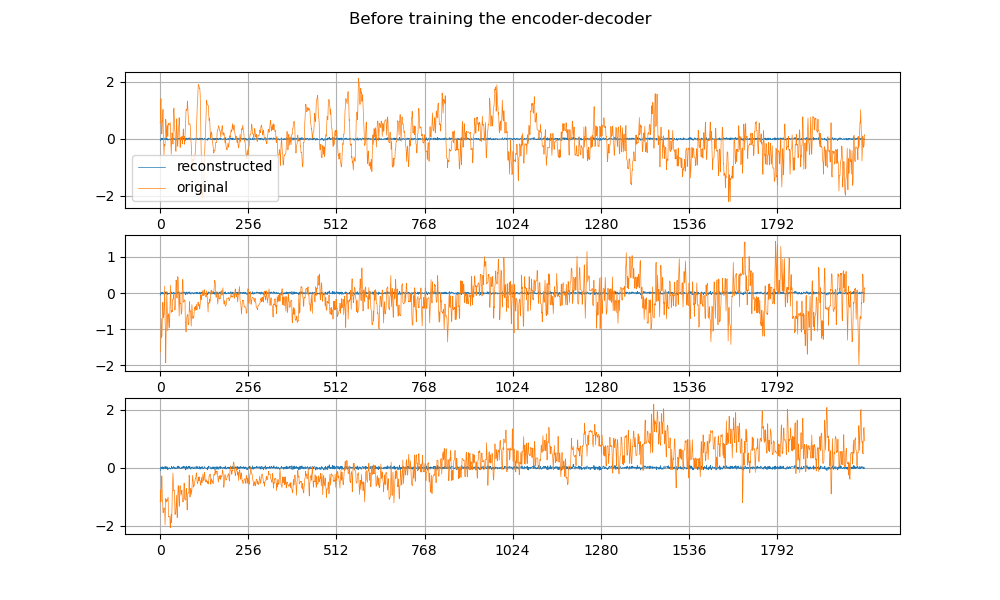

1/1 [==============================] - 0s 18ms/step


In [81]:
# Define new x_train
x_train_2 = scaled_acoustic_waveforms

# Building the encoder and decoder for time-domain waveform data
# Dimension of our original input space
input_dim_2 = 2048

# Dimension of our latent space (encoding space, i.e. bottleneck)
latent_dim_2 = 3

# ENCODER
# "The sequential model allows us to specify a neural network, precisely, sequential: from input to output,
# passing through a series of neural layers, one after the other."
encoder_2 = Sequential([
    
    # Define layers of the neural network (nodes, activation function)
    
    Dense(256, activation='relu', input_shape=(input_dim_2,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(latent_dim_2, activation='relu')
])

# DECODER
decoder_2 = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim_2,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim_2, activation=None)
])

# Combine encoder and decoder to build the autoencoder
autoencoder_2 = Model(inputs=encoder_2.input, outputs=decoder_2(encoder_2.output))

# Using MSE loss function and adam optimiser
autoencoder_2.compile(loss='mse', optimizer='adam')

# Code from https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(9, figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train_2.shape[0]), 1)
        plt.plot(autoencoder_2.predict(x_train_2[idx]).squeeze(), label='reconstructed' if i == 0 else '', linewidth=0.5)
        plt.plot(x_train_2[idx].squeeze(), label='original' if i == 0 else '', linewidth=0.5)
        plt.xticks(np.arange(0, 2048, 256))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

In [82]:
plt.close()

In [83]:
# Training the autoencoder
# Batch size refers to the number of training examples used in one iteration of the model. In other words,
# it is the number of samples that are processed at once by the deep learning model during training.
early_stopping2 = EarlyStopping(monitor='val_loss', patience=400)
model_history = autoencoder_2.fit(x_train_2, x_train_2, epochs=3000, batch_size=32, verbose=0,validation_split=0.2, callbacks=[early_stopping2])

<IPython.core.display.Javascript object>


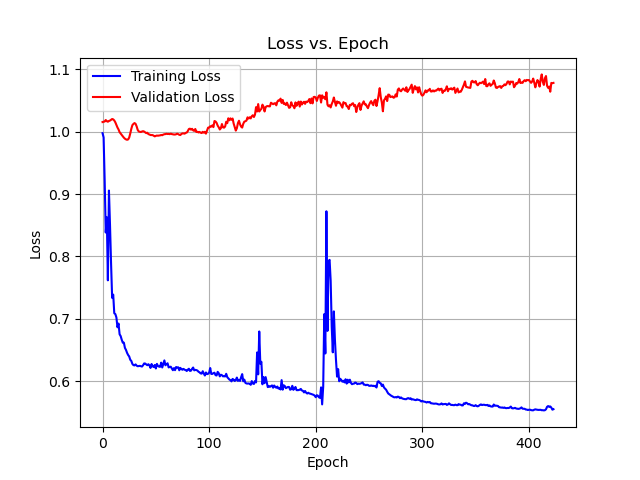

In [84]:
# Plot the loss vs. epochs of training
epochs = range(len(model_history.history['val_loss']))

fig = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

In [85]:
plt.close()

<IPython.core.display.Javascript object>


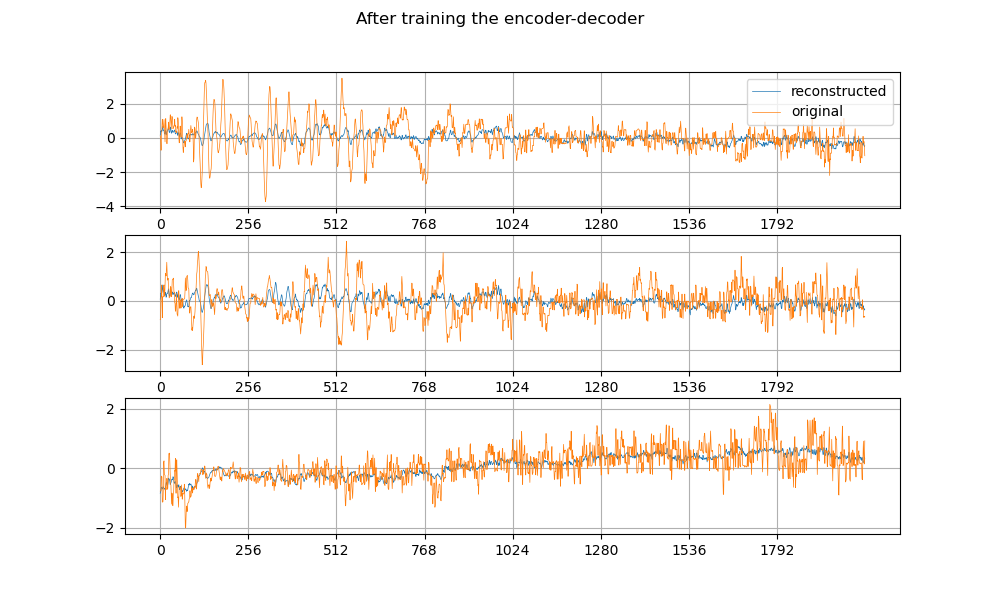

1/1 [==============================] - 0s 19ms/step


In [86]:
plot_orig_vs_recon('After training the encoder-decoder')

In [87]:
plt.close()

<IPython.core.display.Javascript object>


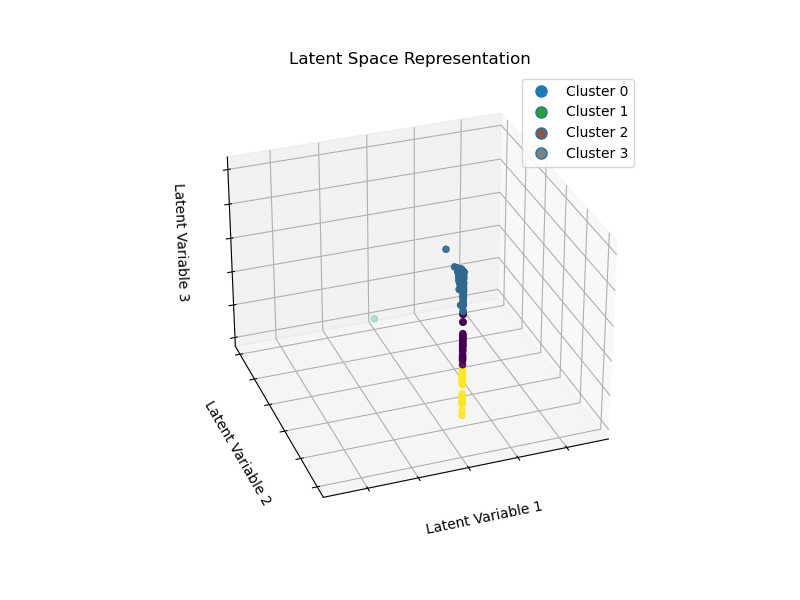

In [88]:
# k-means clustering
encoded_x_train_2 = encoder_2(x_train_2)

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
autoencoder_waveforms_clusters = kmeans.fit(encoded_x_train_2) # fit data using model
labels = autoencoder_waveforms_clusters.labels_ # get labels from clustering analysis

# Create proxy artists for the legend based on cluster labels (from ChatGPT)
proxy_artists = []
for label in range(4):  # Assuming you have 4 clusters
    color = plt.cm.tab10(label / 4.0)  # Use the same color mapping as the scatter plot
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', markersize=8, markerfacecolor=color, label=f'Cluster {label}'))


# Plot the figure
fig9 = plt.figure(9, figsize=(8,6))
ax2 = fig9.add_subplot(111, projection="3d", elev=-150, azim=110)
ax2.scatter(
    encoded_x_train_2[:,0],
    encoded_x_train_2[:,1],
    encoded_x_train_2[:,2],
    c=labels.astype(float))

ax2.set_title("Latent Space Representation")
ax2.set_xlabel("Latent Variable 1")
ax2.xaxis.set_ticklabels([])
ax2.set_ylabel("Latent Variable 2")
ax2.yaxis.set_ticklabels([])
ax2.set_zlabel("Latent Variable 3")
ax2.zaxis.set_ticklabels([])
ax2.legend(handles=proxy_artists)

plt.show()

In [89]:
plt.close()

In [90]:
# Label our original dataset with these new clusters and save it
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
cluster_index = kmeans.fit_predict(encoded_x_train_2) # fit_predict gives us index of the cluster each sample belongs to
original_data['Cluster Index'] = cluster_index # add cluster index as the last column
original_data.to_csv('pristine_cell_WAVEFORMS_clustered_data_using_autoencoder.csv')

The autoencoder does not work for our 2000 dimensional time-domain waveform data. Initially, I tried training it to 3000 epochs, and then I compared the reconstructed and original signals. They matched up very well but I suspected the network might be overfitting to our dataset. This was indeed the case because when I checked validation loss and training loss over time validation loss does not decrease signficantly.

## 3. Classification Using Supervised Machine Learning with Pristine and Aged Cell Data

Hits dataset of pristine and aged cell cycling will be fed into a supervised learning classifier (e.g. logistic regression, support vector machine, deep neural network) to classify aged and pristine cell signals. Signals that I am certain are nois signals have been manually removed.

### 3.1. Classification of Aged vs. Pristine Cell Signals using Logistic Regression

### 3.2. Classification of Aged vs. Pristine Cell Signals using Neural Networks

In [197]:
import pandas as pd
data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/NOISE FILTERED Pristine and Aged P42A Machine Learning Data.csv', delimiter =',')

In [198]:
data

Waveform Number  C-Rate  Transducer Position  Rise Time  Counts to Peak  \
0                  1    0.33                   18         12               7   
1                  2    0.33                   18          1               3   
2                  4    0.33                   18         22               4   
3                  5    0.33                   18          1               1   
4                  6    0.33                   18          2               3   
..               ...     ...                  ...        ...             ...   
155               13    0.33                   18         13               1   
156               17    0.33                   18          1               2   
157               23    0.33                   18          1               1   
158               25    0.33                   18          2               2   
159               26    0.33                   18         14               3   

     Energy  Duration  Amplitude  Average Frequency     RMS  ASL  PCNTS  \
0         0        73         37                 95  0.0004   16      3   
1         0        64         33                 46  0.0004   16      1   
2         0        95         45                 42  0.0004   16      2   
3         0         1         31               1000  0.0004   16      1   
4         0        96         34                 31  0.0004   16      1   
..      ...       ...        ...                ...     ...  ...    ...   
155       0        13         28                 76  0.0004   16      1   
156       0         5         35                400  0.0004   16      1   
157       0         1         30               1000  0.0004   16      1   
158       0        42         36                 47  0.0004   16      1   
159       0        56         37                 53  0.0004   16      1   

     Threshold  Reverberation Frequency  Initiation Frequency  \
0           29                       66                   250   
1           29                       32                  1000   
2           29                       28                    90   
3           29                     1000                  1000   
4           29                       22                   500   
..         ...                      ...                   ...   
155         29                     1000                    76   
156         29                      251                  1000   
157         29                     1000                  1000   
158         29                       26                   500   
159         29                       48                    71   

     Signal Strength  Absolute Energy Classification  
0          1060000.0        3560.0000       Pristine  
1           888000.0        1970.0000       Pristine  
2          4470000.0       41700.0000       Pristine  
3            58000.0         206.0000       Pristine  
4           933000.0        1840.0000       Pristine  
..               ...              ...            ...  
155            210.0           0.5430           Aged  
156            140.0           0.5840           Aged  
157              6.1           0.0196           Aged  
158           1250.0           4.8800           Aged  
159           1810.0           7.9200           Aged  

[160 rows x 18 columns]

In [199]:
# Extract classification column from data frame
classification = data['Classification']

In [200]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(classification)
labels = encoder.transform(classification)

In [201]:
# 1 is pristine and 0 is aged
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [202]:
# get rid of columns we don't need
data.drop(['Waveform Number', 'C-Rate', 'Transducer Position', 'Classification'], inplace=True, axis=1)

In [203]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data)

In [204]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split

# The shuffle function randomly changes the order of the various rows.
# Finally, the random_state initializes the seed for the random function used to split the dataset.
# Setting the random state allows the experiment to be easily reproduced and ensures results within the same parameters.
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels,
    test_size=0.2, shuffle = True, random_state = 8)

In [278]:
# create deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [279]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [280]:
# Train the classifier
early_stopping3 = EarlyStopping(monitor='val_loss', patience=150)
model_history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0,validation_split=0.2, callbacks=[early_stopping3])

In [281]:
# Validation loss over time
model_history.history['val_loss']

[0.6980217695236206,
 0.6973106861114502,
 0.6965842843055725,
 0.6961522698402405,
 0.6957377791404724,
 0.6952988505363464,
 0.6949259638786316,
 0.6946309208869934,
 0.6943745017051697,
 0.6942183375358582,
 0.6940499544143677,
 0.6937280893325806,
 0.6933144330978394,
 0.6929584741592407,
 0.6927493810653687,
 0.6926782131195068,
 0.6923640370368958,
 0.6921089887619019,
 0.6919532418251038,
 0.6919266581535339,
 0.6919213533401489,
 0.6916438341140747,
 0.6913782358169556,
 0.6911236047744751,
 0.690800130367279,
 0.6903985738754272,
 0.69001305103302,
 0.6896000504493713,
 0.6890255808830261,
 0.688625693321228,
 0.6882299184799194,
 0.6878799796104431,
 0.6874008178710938,
 0.6870425939559937,
 0.6871147751808167,
 0.6871068477630615,
 0.6869964599609375,
 0.6869103312492371,
 0.6869053244590759,
 0.6869046092033386,
 0.6868284940719604,
 0.6870117783546448,
 0.6870378255844116,
 0.6869999170303345,
 0.6869821548461914,
 0.6867630481719971,
 0.686651349067688,
 0.686479687690734

<IPython.core.display.Javascript object>


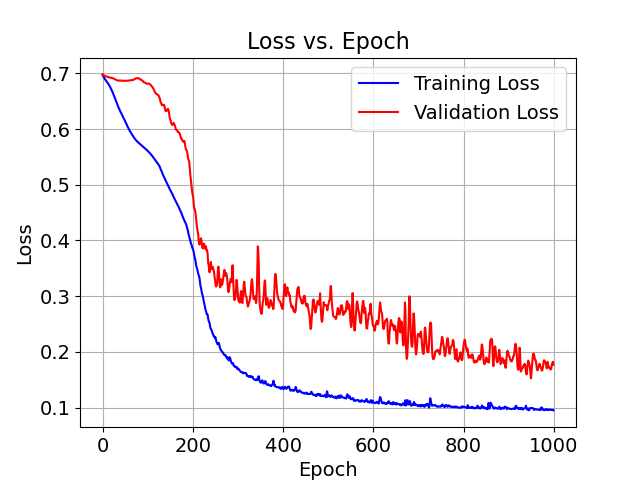

In [282]:
# Plot the loss vs. epochs of training
epochs = range(len(model_history.history['val_loss']))

fig, ax = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [284]:
# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

In [285]:
plt.close()

It may take multiple tries for the neural network to train properly. I aim to get the validation loss to converge down as close as possible to the training loss and I also aim to have around a 1000 epochs of training. From trial and error: a good training should have the training loss down to 0.1 and validation loss at around 0.2.

In [286]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.1833 - accuracy: 0.8750 - 32ms/epoch - 32ms/step

Test accuracy: 0.875


In [287]:
# Make predictions with test data
predictions = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [288]:
# The trained model's prediction on the test dataset
np.around(predictions)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [289]:
# The actual labels of the test dataset
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [290]:
# Make confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    np.around(predictions),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<IPython.core.display.Javascript object>


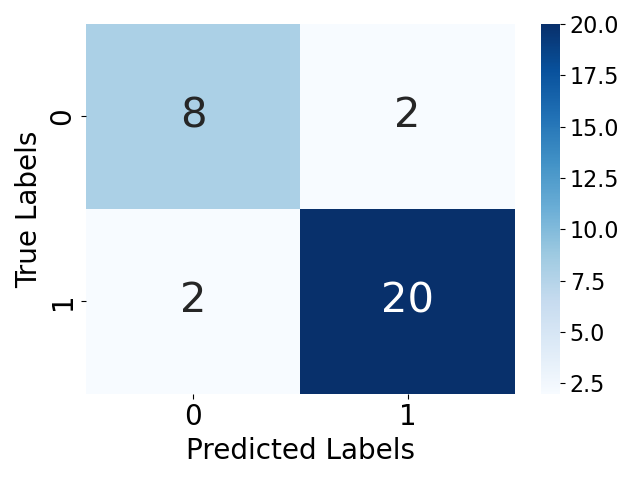

In [325]:
# Plot the confusion matrix using a heatmap
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', annot_kws={'fontsize': 30})
plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)

# Increase font size of tick labels on x-axis
plt.xticks(fontsize=20)

# Increase font size of tick labels on y-axis
plt.yticks(fontsize=20)

colorbar = heatmap.collections[0].colorbar  # Get the colorbar object
colorbar.ax.tick_params(labelsize=16)  # Increase font size of colorbar ticks

plt.tight_layout()  # Helps in ensuring all elements of the plot are visible

plt.show()

In [326]:
# plt.savefig("/Users/seungbinjoo/Desktop/SoH_confusion_matrix.png", dpi=500)  # You can change the format and resolution as needed

In [115]:
plt.close()

Recall: 0 is aged and 1 is pristine.

Note: neural network sometimes fails to train properly. I found that the model performs the best when we reach training epochs on the order of 400 to 1000. Sometimes, the early stopping mechanism stops the training early and the validation loss fails to decrease signficantly. In that case, we need to retrain the network. This behaviour likely can be improved with a larger dataset.

Although our model's accuracy seems to be very good, this does not necessarily mean that our model is distinguishing between a pristine and aged cell. There may be experimental bias in the sense that we are testing on two different physical cells so the model may be picking up features that are inherently different between the two different cells which are not necessarily associated with a cell's age. To eliminate this possibility of experimental bias, we should do the same tests on different pristine cells and different aged cells. We cannot be 100% sure that we have eliminated experimental bias however, for every cell and every C-rate run for each cell, we varied the transducer position. The fact that our dataset has taken into account different transduce positions means that the model may be less sensitive to small experimental biases such as surface conditions, effectiveness of couplant application, temperature, etc.

Improvement: try k-fold cross validation?

To make an argument for the model that it is not just picking up experimental biases, we can test the model on another unseen dataset. This dataset is from week 1 and week 2 of my internship where I was cycling a totally separate pristine cell at C/3, 28dB around the 18mm position. If we make predictions using the model, the model should label most of these waveforms as pristine, assuming our model is working well. Although, this specific experiment run showed quite anamalous behaviour where there was 6-7 times more acoustic hits over 10 cycles than normally expected. Noise signals were manually removed from this data set as well.

In [148]:
extra_test_data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Cylindrical Cell AE Matrix Experiment/Machine Learning Files/Week 1 and 2 Preliminary Data ML Files/Week 1 and 2 experiment middle position Cby3 data v2.csv', delimiter =',')

In [149]:
extra_test_data

Waveform Number  C-Rate  Transducer Position  Rise Time  Counts to Peak  \
0                  1    0.33                   36          1               2   
1                  2    0.33                   36          8               1   
2                  4    0.33                   36          5               3   
3                  7    0.33                   36          1               1   
4                  8    0.33                   36          1               1   
..               ...     ...                  ...        ...             ...   
192              200    0.33                   36          1               1   
193              201    0.33                   36          1               1   
194              202    0.33                   36          1               1   
195              203    0.33                   36          1               1   
196              204    0.33                   36          1               2   

     Energy  Duration  Amplitude  Average Frequency     RMS  ASL  PCNTS  \
0         0         2         33               1000  0.0004   16      1   
1         0         9         30                111  0.0004   16      1   
2         0        38         37                 78  0.0004   16      1   
3         0         1         32               1000  0.0004   16      1   
4         0         5         31                200  0.0004   16      1   
..      ...       ...        ...                ...     ...  ...    ...   
192       0         1         32               1000  0.0004   16      1   
193       0         1         32               1000  0.0004   16      1   
194       0         1         33               1000  0.0004   16      1   
195       0         1         34               1000  0.0004   16      1   
196       0         3         33                666  0.0004   16      1   

     Threshold  Reverberation Frequency  Initiation Frequency  \
0           29                     1001                  1000   
1           29                        1                   125   
2           29                       61                   200   
3           29                     1000                  1000   
4           29                        1                  1000   
..         ...                      ...                   ...   
192         29                     1000                  1000   
193         29                     1000                  1000   
194         29                     1000                  1000   
195         29                     1000                  1000   
196         29                      501                  1000   

     Signal Strength  Absolute Energy Classification  
0               73.2           0.3000       Pristine  
1               88.5           0.2070       Pristine  
2              830.0           2.7700       Pristine  
3               61.0           0.2280       Pristine  
4              119.0           0.3740       Pristine  
..               ...              ...            ...  
192             18.3           0.0909       Pristine  
193             36.6           0.1230       Pristine  
194             30.5           0.1040       Pristine  
195             48.8           0.1910       Pristine  
196             76.3           0.2630       Pristine  

[197 rows x 18 columns]

In [153]:
classification2 = extra_test_data['Classification']

extra_test_data.drop(['Waveform Number', 'C-Rate', 'Transducer Position', 'Classification'], inplace=True, axis=1)
X_test_2 = extra_test_data

encoder = LabelEncoder()
encoder.fit(classification2)
labels2 = encoder.transform(classification2)

std_scaler = StandardScaler()
scaled_X_test_2 = std_scaler.fit_transform(X_test_2)

predictions2 = model.predict(scaled_X_test_2)

confusion_matrix2 = tf.math.confusion_matrix(
    labels2,
    np.around(predictions2),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

KeyError: 'Classification'

In [151]:
plt.close()

In [152]:
test_loss, test_acc = model.evaluate(scaled_X_test_2, labels2, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 30.8280 - accuracy: 0.6548 - 43ms/epoch - 6ms/step

Test accuracy: 0.6548223495483398


### 3.3. Classification of 1C vs C/3 Cycling Signals

Exact same method as section 3.2 but with differentiating between 1C and C/3 signals.